# 分かったこと

- 理論的には右肩下がりになるはず。
- hopGの増加に伴う変化は、ほぼ理論通りだが、まれに山が生じる場合 (randomとSF) がある。
- hopLの増加に伴う変化は、ほぼ理論通りだが、まれに谷が生じる場合、右肩上がりになる場合、山が生じる場合 (regularのみ)がある。

谷と右肩上がりは同じ理屈で説明できそう。山に関してはエラーじゃないか？細かい検証が必要。

## 全体の様子を確認するためのパラメータ ('20220910_173658', '20220915_103319', '20220918_235342')

```
trial_count = 8
agent_count = 10^3  # 10^4
generations = 10^4  # 10^5

network_type_list = [:scale_free_4, :regular_4, :random_4]  # [:scale_free_4, :regular_4, :random_4]
hop_game_list = [1, 2, 3, 4, 5, 6]  # [1, 2, 3, 4, 5, 6]
hop_learning_list = [1, 2, 3, 4, 5, 6]  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [3.0, 4.0, 5.0, 6.0]  # [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.0, 0.01]  # [0.0, 0.01]
δ_list = [0.0625, 0.25, 1.0]  # [0.0625, 0.125, 0.25, 0.5, 1.0]
interaction_rule_list = [PairWise, Group]  # [PairWise, Group]
update_rule_list = [BD, DB, IM]  # [BD, DB, IM]
```

## hopG = 2 の山を確認するためのパラメータ ('20220920_171157', '20220920_171958')

```
trial_count = 24
agent_count = 10^4  # 10^4
generations = 10^5  # 10^5

network_type_list = [:random_4]  # [:scale_free_4]
hop_game_list = [1, 2, 3]  # [1, 2, 3, 4, 5, 6]
hop_learning_list = [1]  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [6.0]  # [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.0]  # [0.0, 0.01]
δ_list = [1.0]  # [0.0625, 0.125, 0.25, 0.5, 1.0]
interaction_rule_list = [PairWise]  # [PairWise, Group]
update_rule_list = [IM]  # [DB]
```

## レギュラーグラフ / SF について調べるパラメータ ('20220921_160236', '20220921_163408')
```
trial_count = 24
agent_count = 10^3  # 10^4
generations = 10^4  # 10^5

network_type_list = [:regular_4]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [3.0, 4.0, 5.0, 6.0]
μ_list = [0.0]
δ_list = [1.0]
interaction_rule_list = [PairWise, Group]
update_rule_list = [BD, DB, IM]
```

## ペアワイズの利得表を修正した後の状態を調べるパラメータ ('20220921_175627')

'20220921_170840' は全く進化しない。利得表が適当なので当然。

||C|D|
|:-:|:-:|:-:|
|C| b - c| -c |
|D| b | 0 |

'20220921_175627' これもだめ。利得表をちゃんとしたのにだめ。

||C|D|
|:-:|:-:|:-:|
|C| b - c| b/2 - c |
|D| b/2 | 0 |

'' これまで隣人全員と対戦していたので、一人をランダムに選んで対戦するように修正。

In [1]:
import glob
import itertools
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.0, style = 'darkgrid')

In [32]:
COLUMNS = {
    'network_type': str,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'interaction_rule': str,
    'update_rule': str,
    'trial': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return _df.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

# Group Interaction

In [3]:
%%time
dir_names = [
    '20220910_173658', '20220915_103319', '20220918_235342',
    '20220920_171157', '20220920_171958',
    '20220921_160236', '20220921_163408',
]
file_list = list(itertools.chain.from_iterable([glob.glob('../data/{}/*.csv'.format(dir_name)) for dir_name in dir_names]))
df_list = [load_df(file) for file in file_list]
df_raw = pd.concat(df_list).reset_index(drop=True)
df = df_raw.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': [len, np.mean, np.std]}).reset_index()
df.columns = GROUPBY_COLUMNS + ['trial', 'cooperator_rate', 'std']
df = df[df.interaction_rule == 'Group']
df

CPU times: user 1.3 s, sys: 81.3 ms, total: 1.38 s
Wall time: 1.5 s


,network_type,hop_game,hop_learning,b,μ,δ,interaction_rule,update_rule,trial,cooperator_rate,std
0,random_4,1,1,3.0,0.00,0.0625,Group,BD,24,0.00000,0.000000
1,random_4,1,1,3.0,0.00,0.0625,Group,DB,24,0.00000,0.000000
2,random_4,1,1,3.0,0.00,0.0625,Group,IM,24,0.00031,0.001065
6,random_4,1,1,3.0,0.00,0.2500,Group,BD,24,0.00000,0.000000
7,random_4,1,1,3.0,0.00,0.2500,Group,DB,24,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
15685,scale_free_4,6,6,6.0,0.01,0.2500,Group,DB,24,0.00000,0.000000
15686,scale_free_4,6,6,6.0,0.01,0.2500,Group,IM,24,0.00000,0.000000
15690,scale_free_4,6,6,6.0,0.01,1.0000,Group,BD,24,0.00000,0.000000
15691,scale_free_4,6,6,6.0,0.01,1.0000,Group,DB,24,0.00000,0.000000


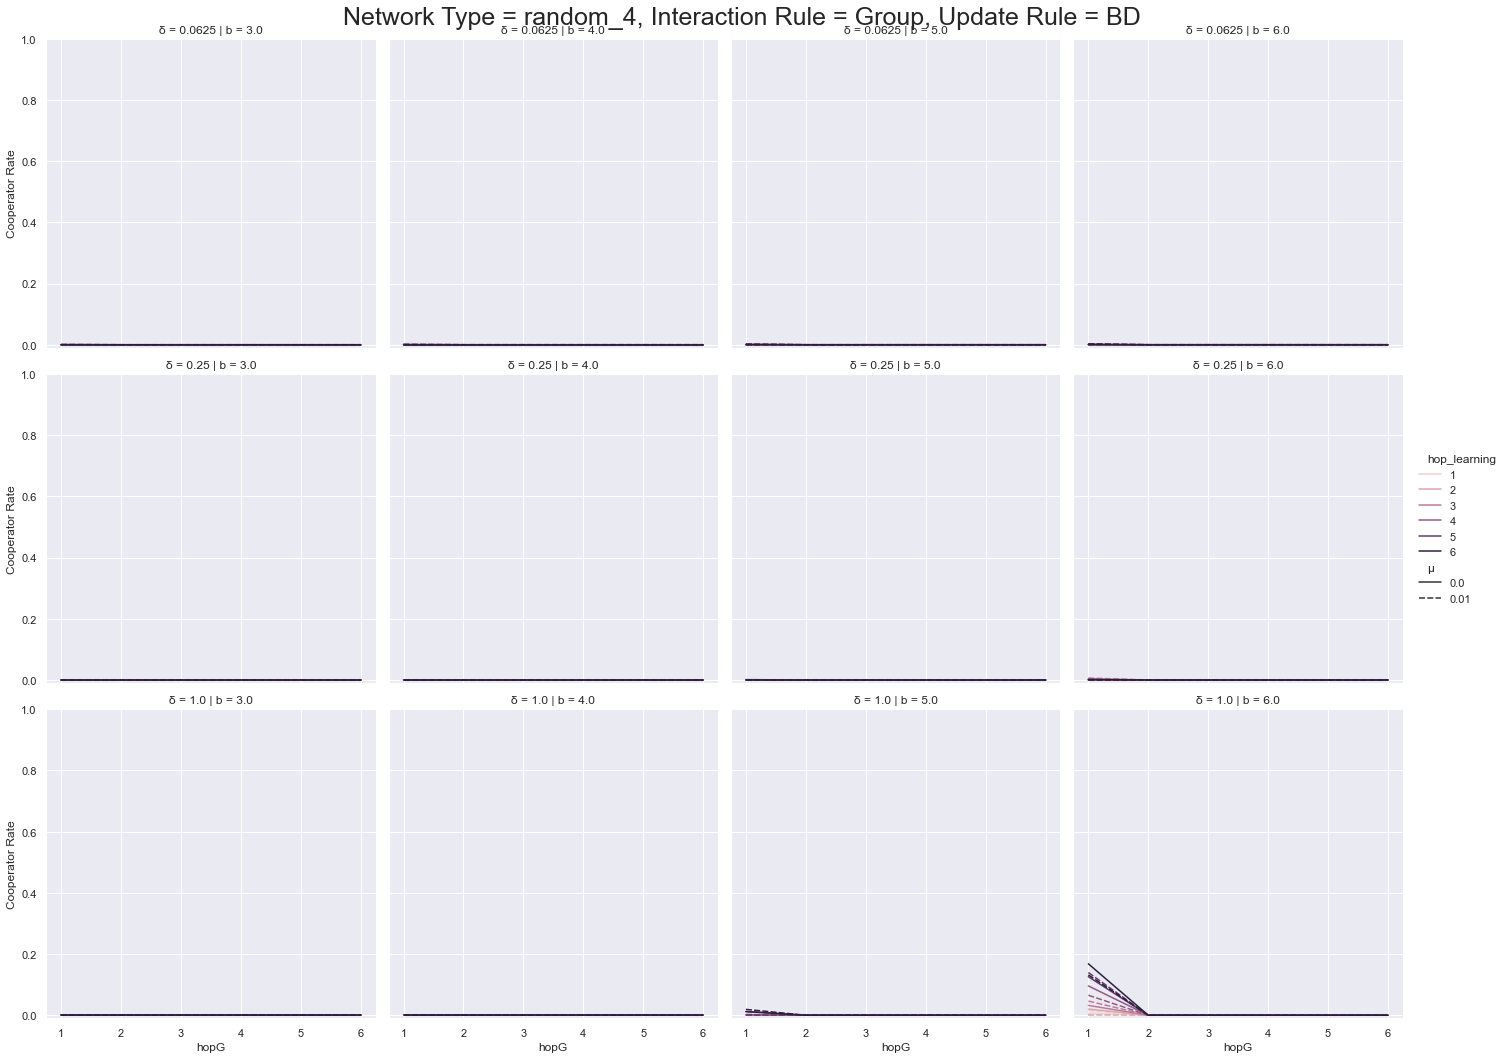

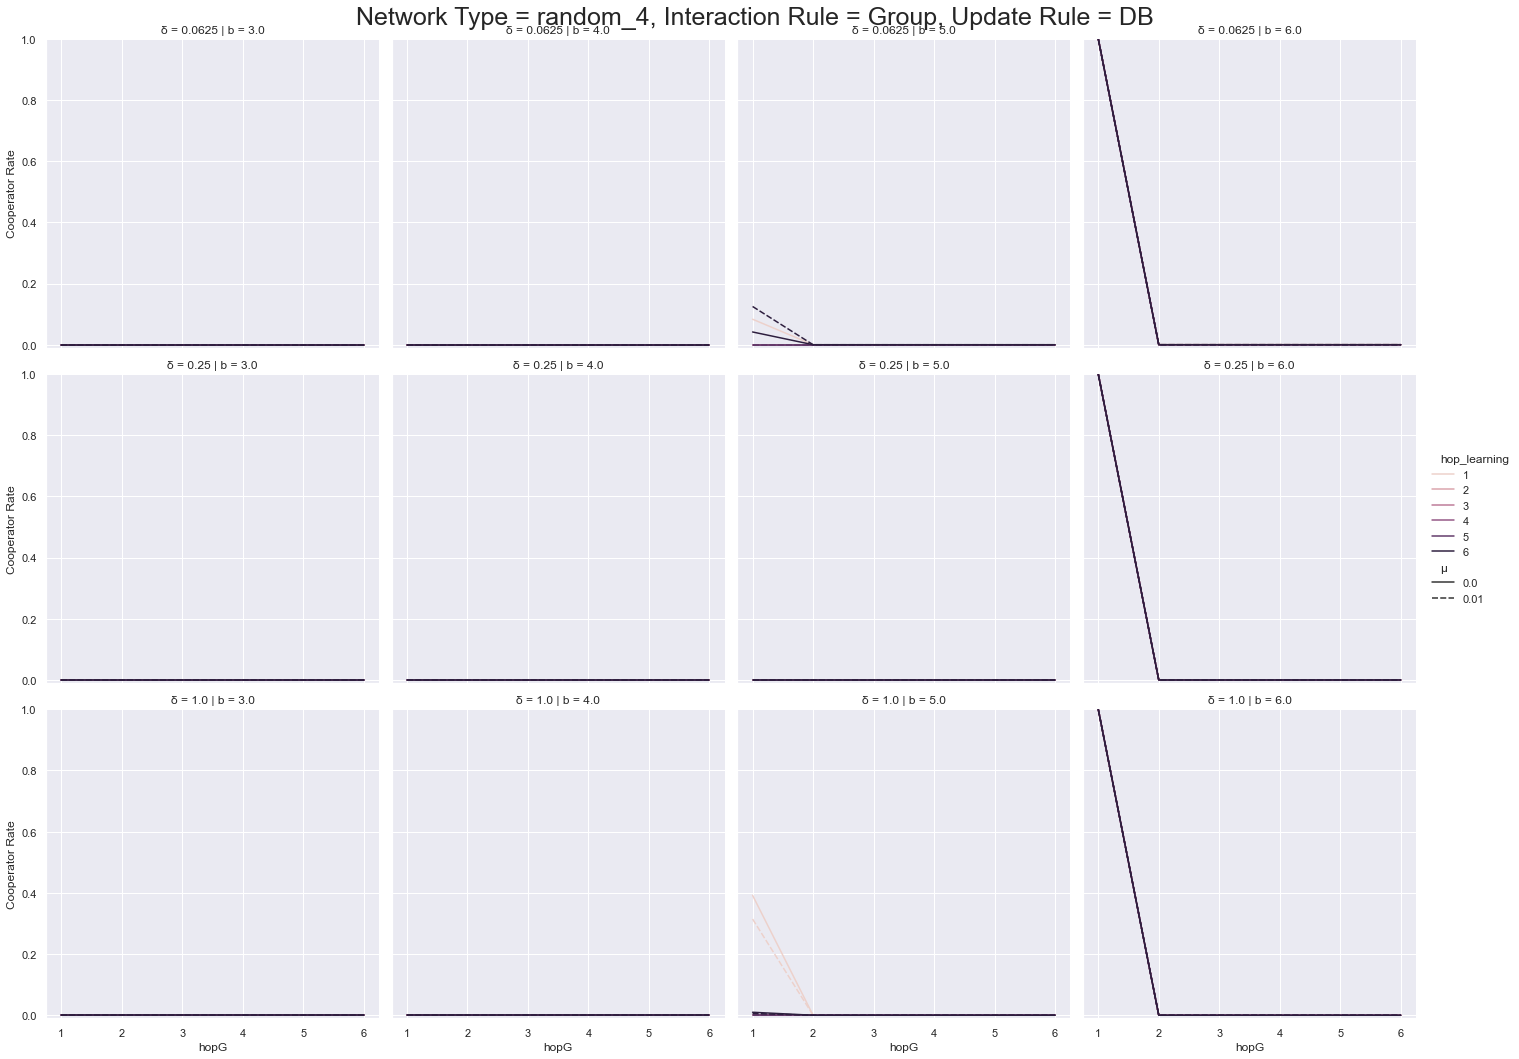

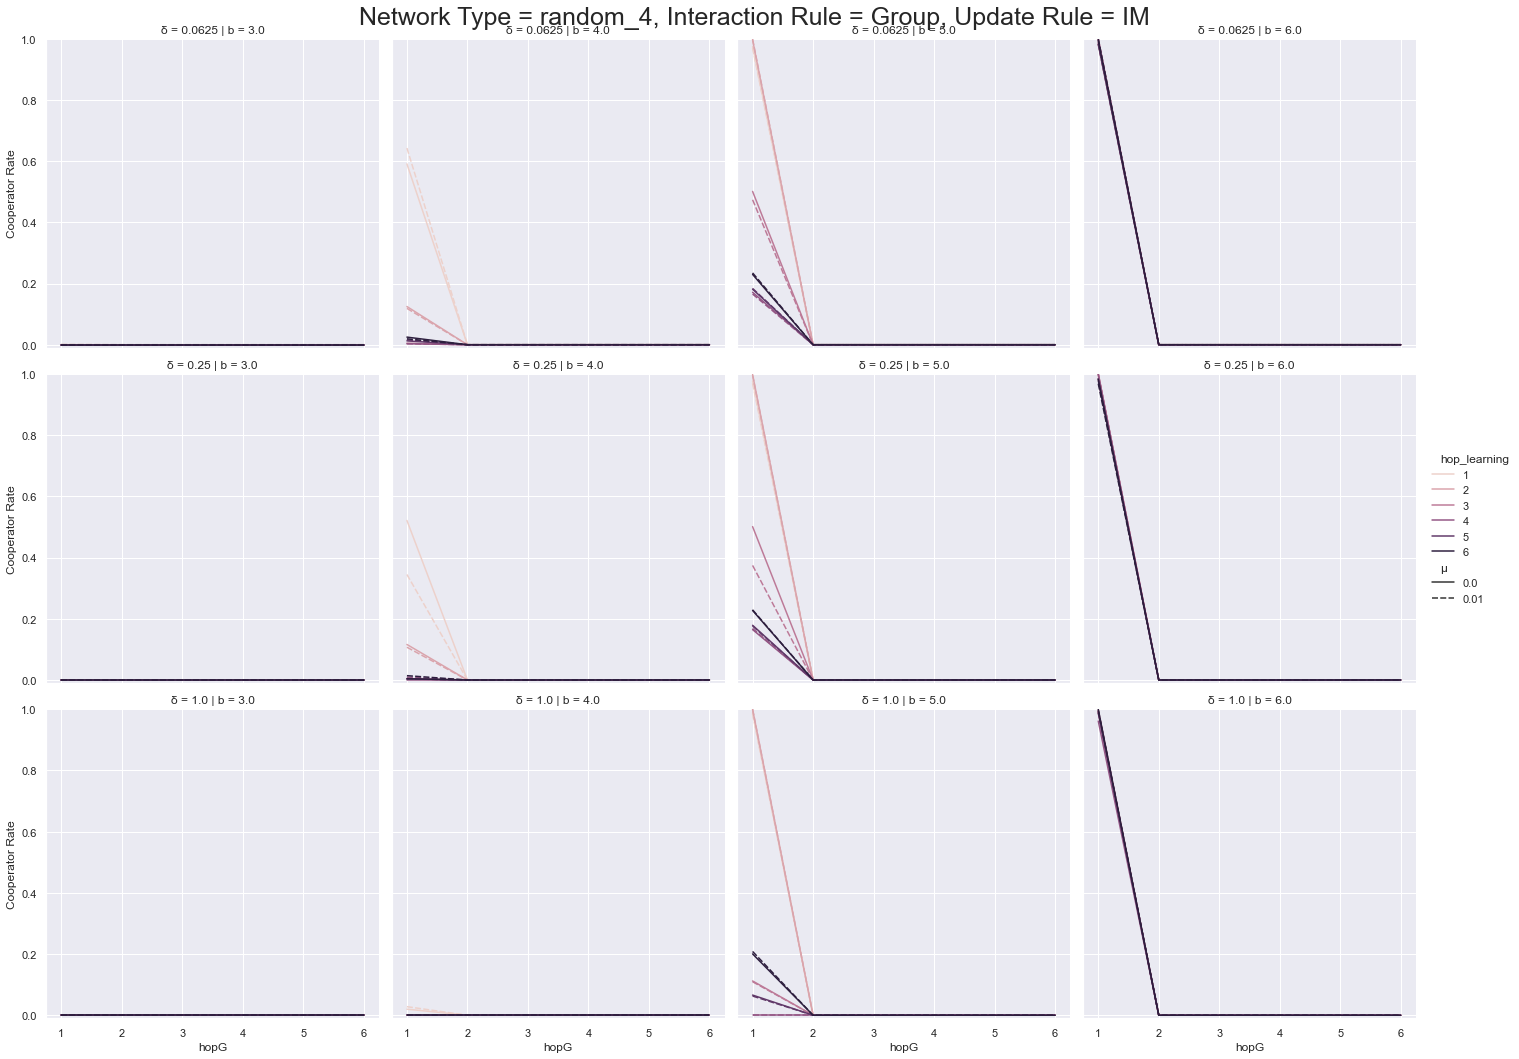

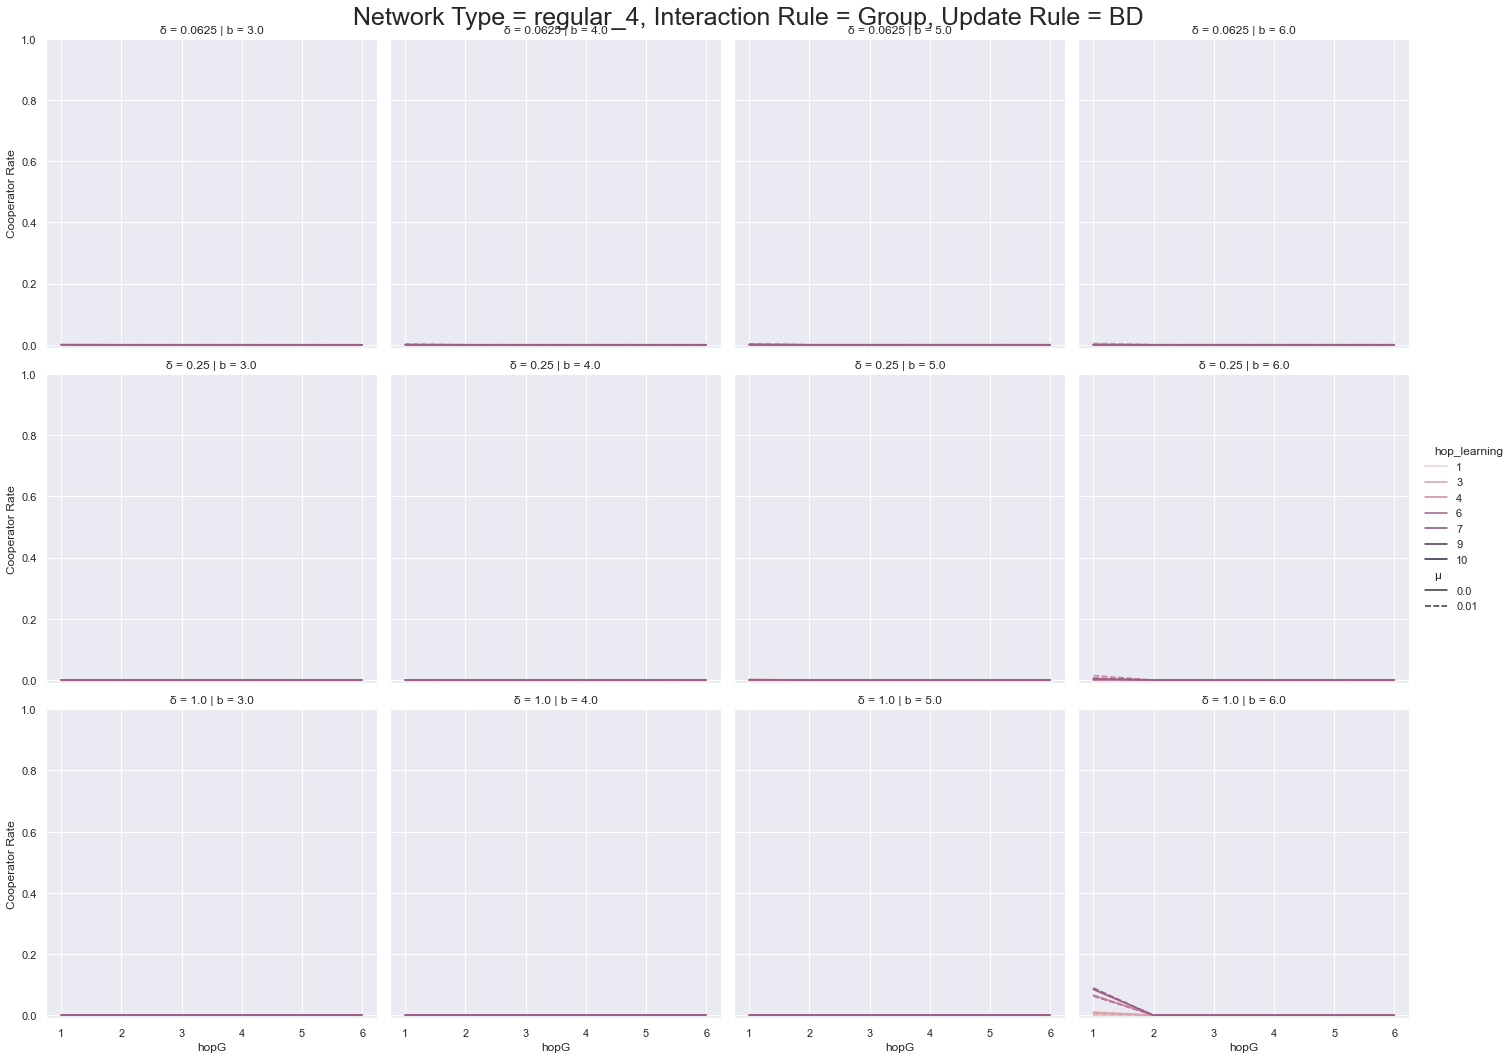

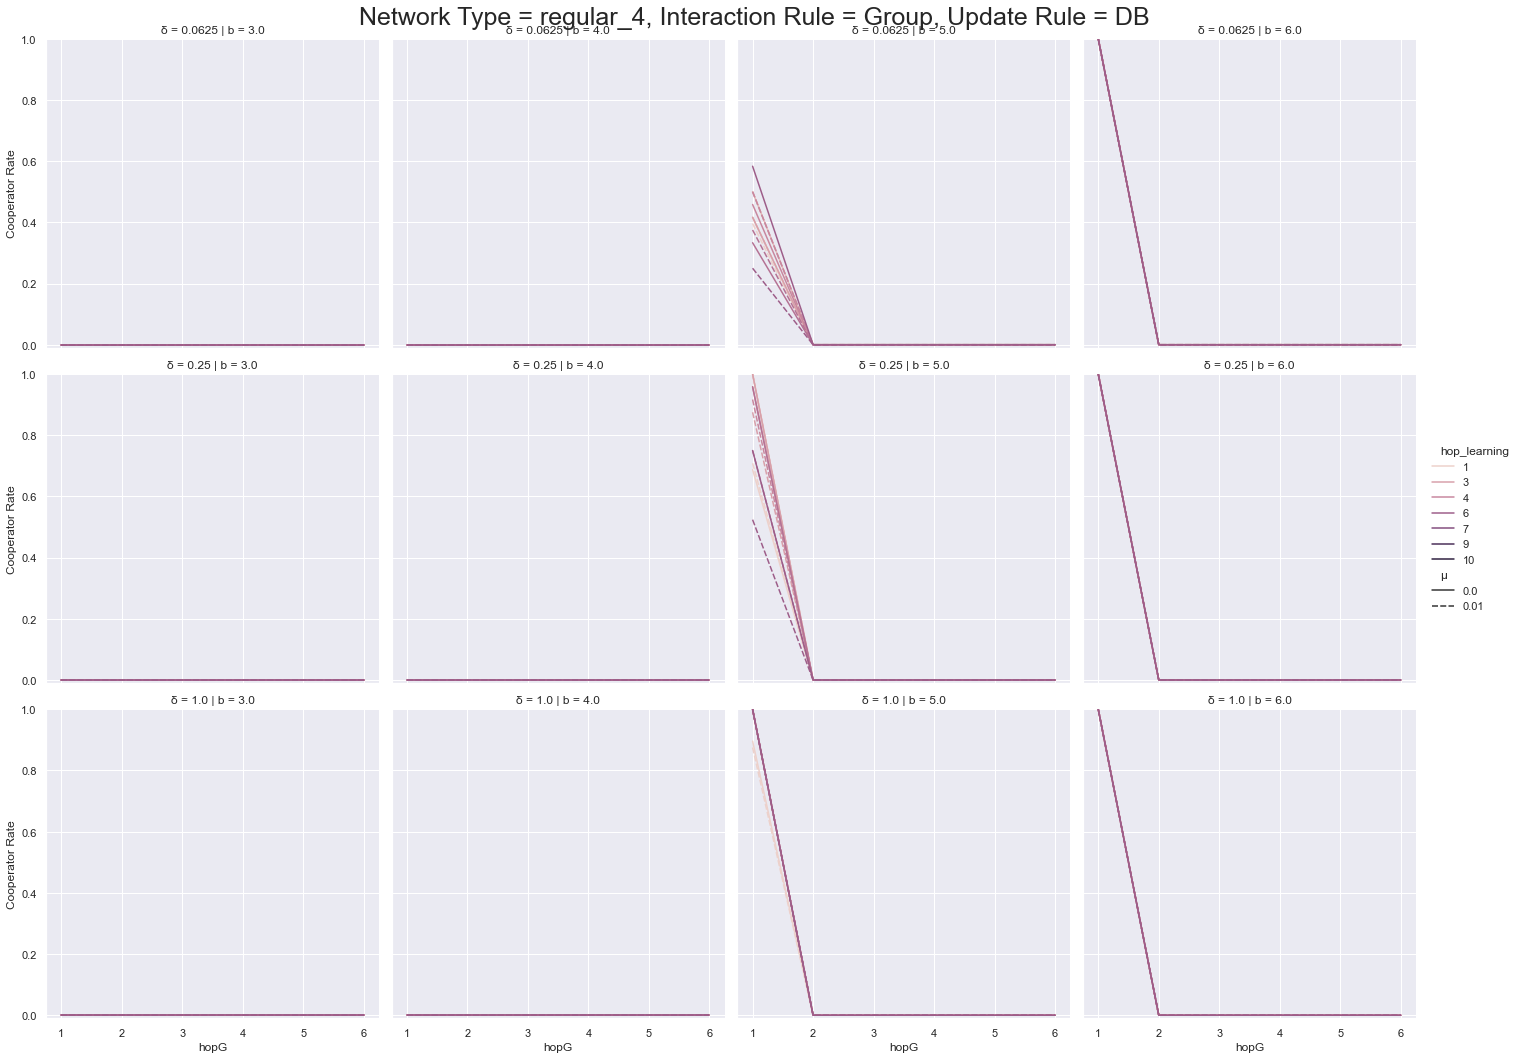

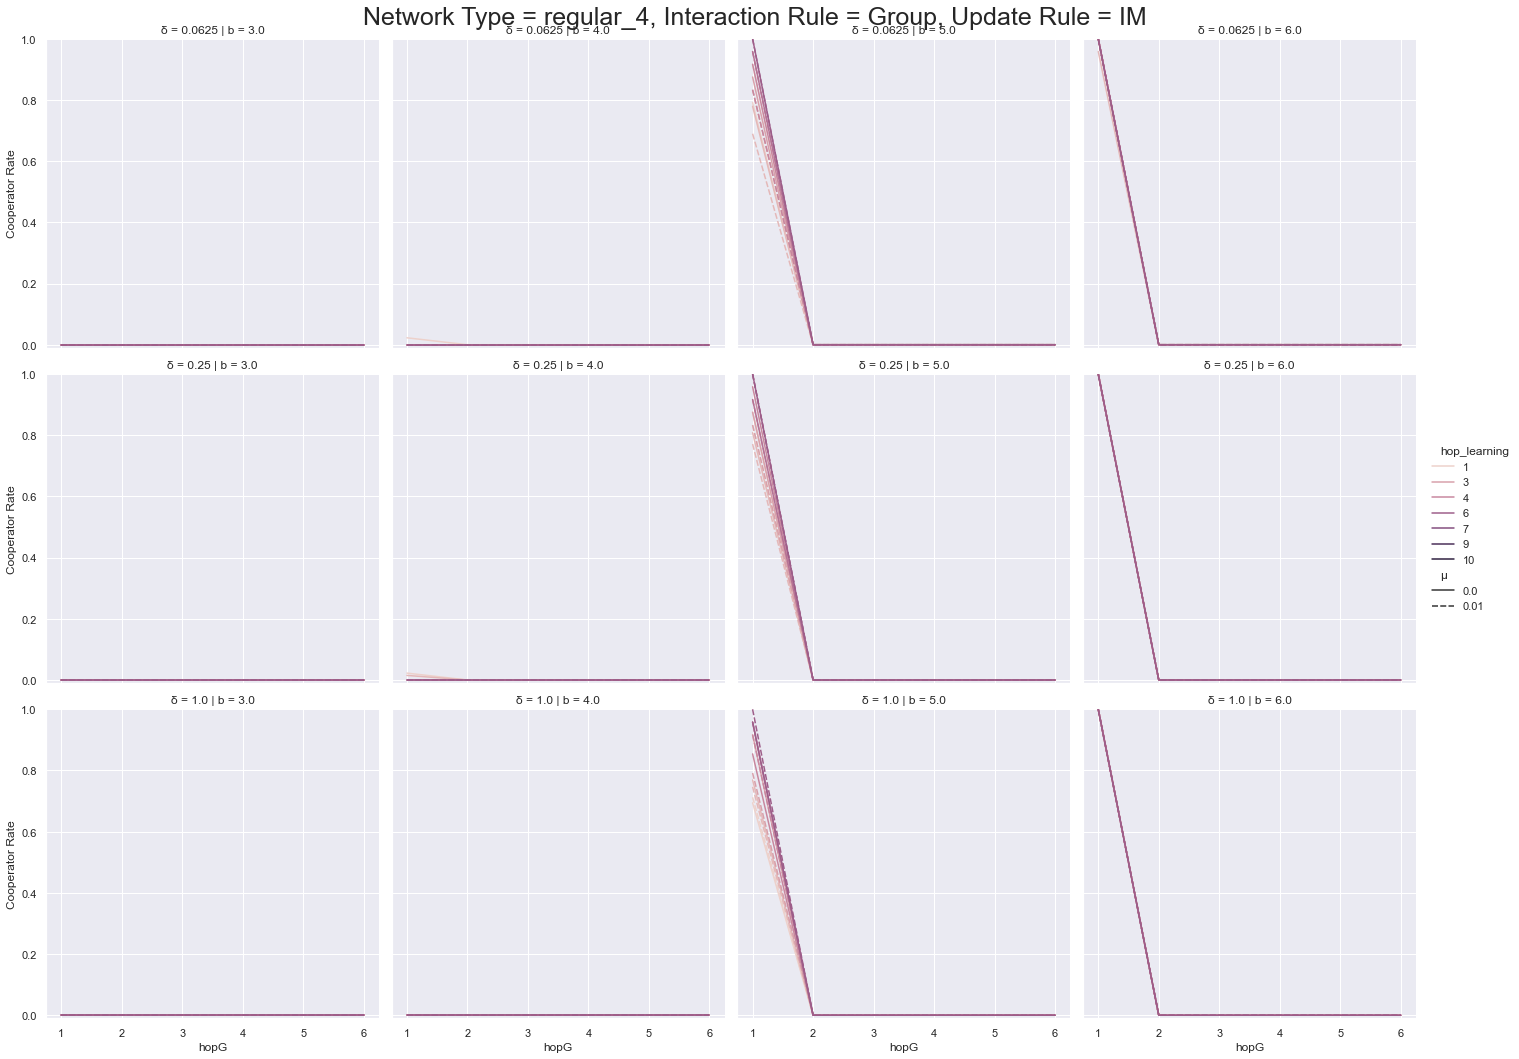

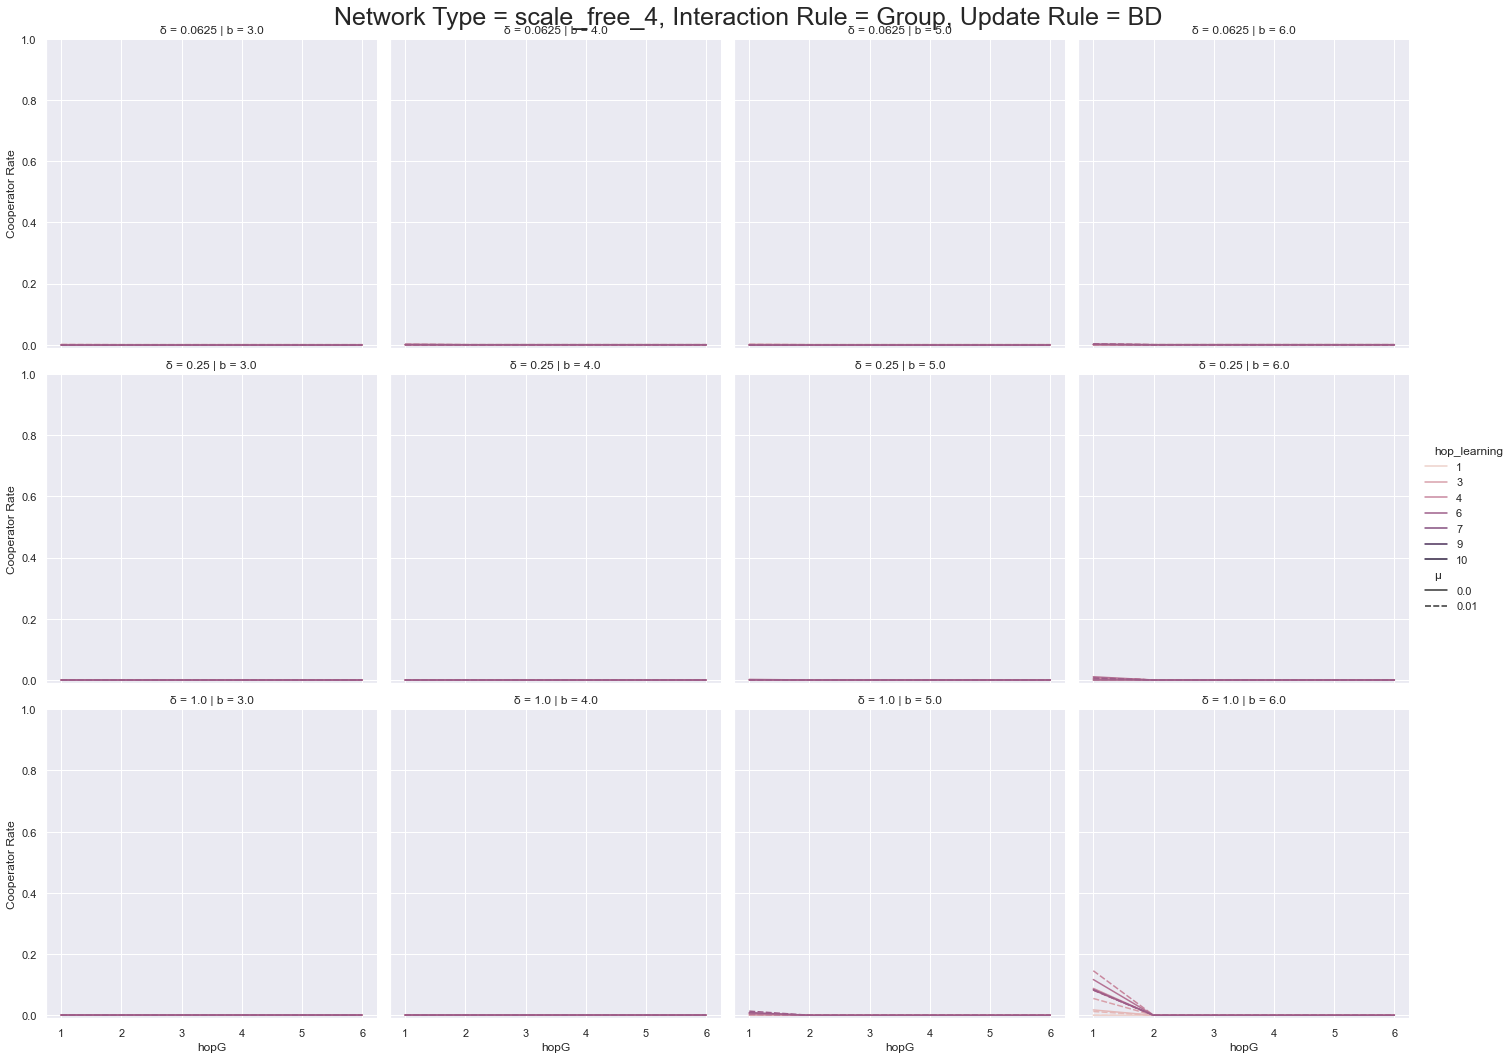

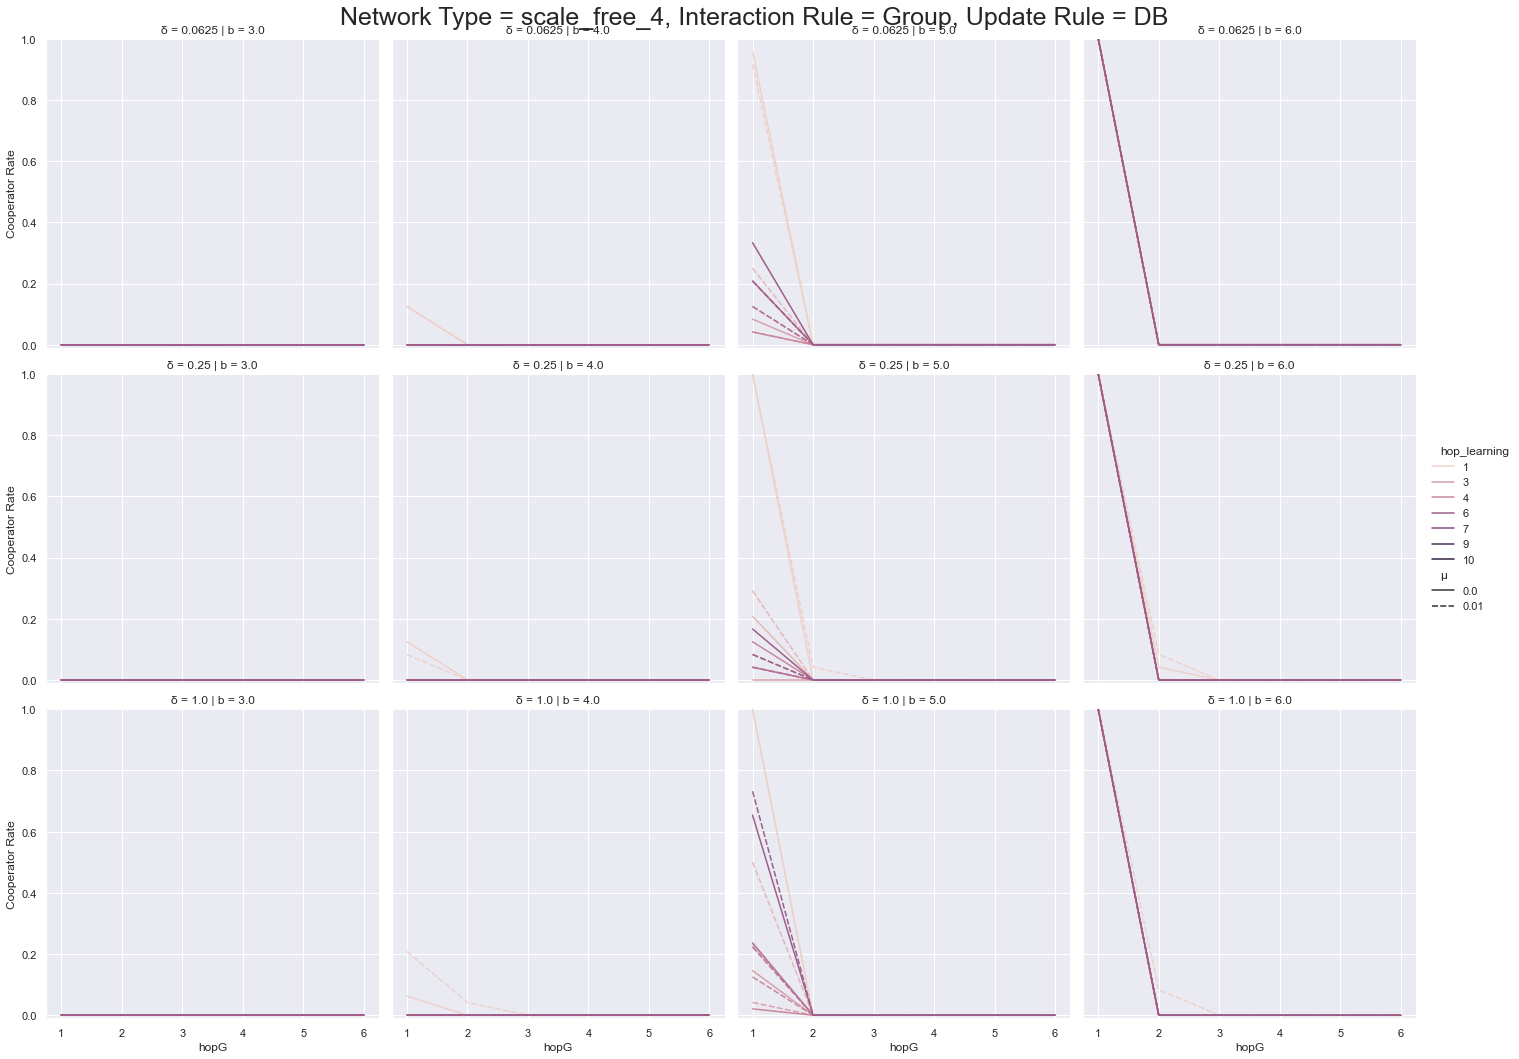

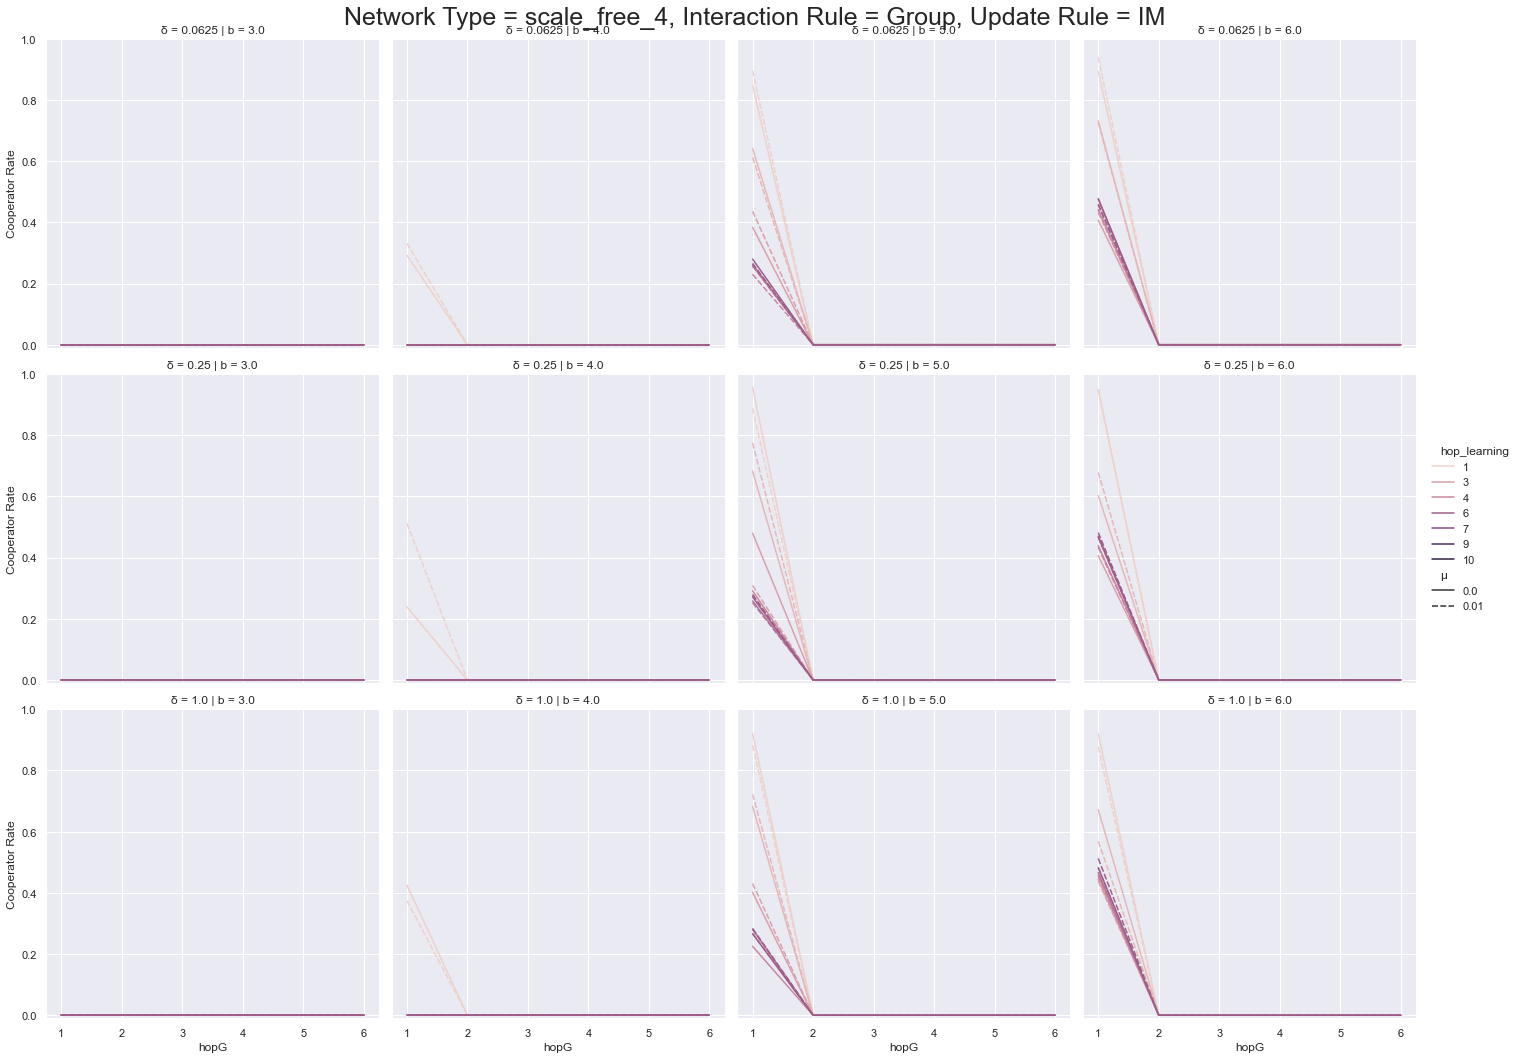

In [4]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', row='δ', col='b', style='μ', data=_df)
    g.set_axis_labels('hopG', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Interaction Rule = {}, Update Rule = {}'.format(network_type, interaction_rule, update_rule), size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))

相互作用グラフを拡張すると協力が進化しないことが確認されたので、相互作用グラフの拡張ホップ数を1に固定して、戦略更新グラフを拡張するとどうなるかを見る。

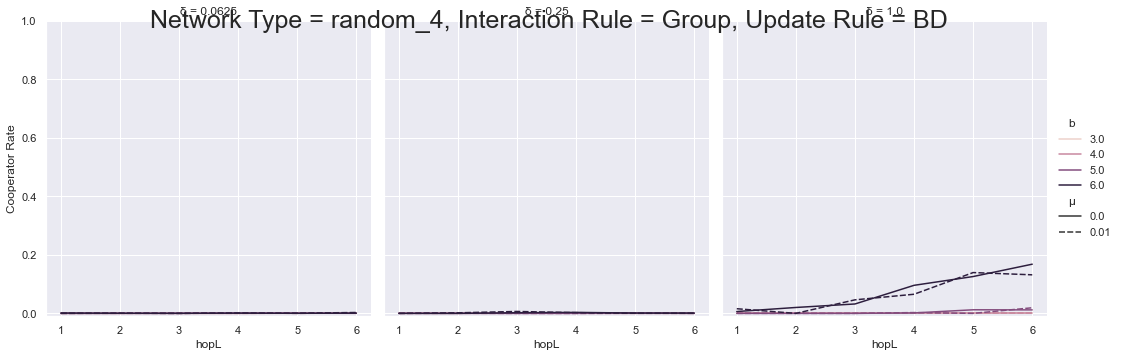

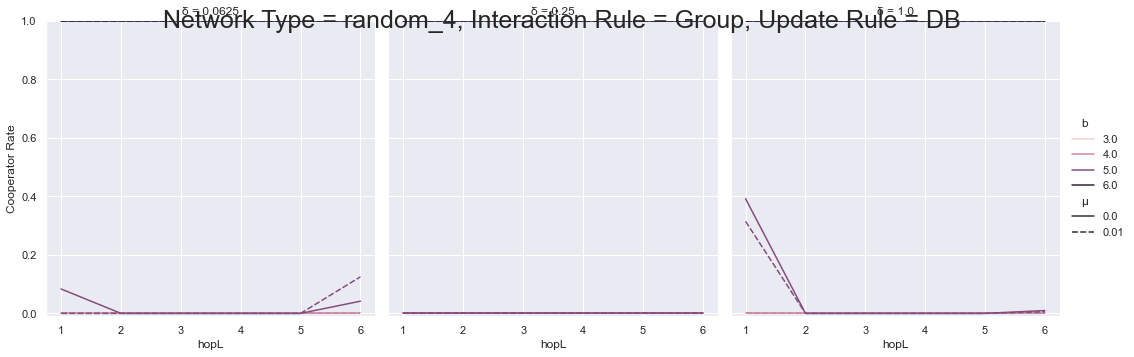

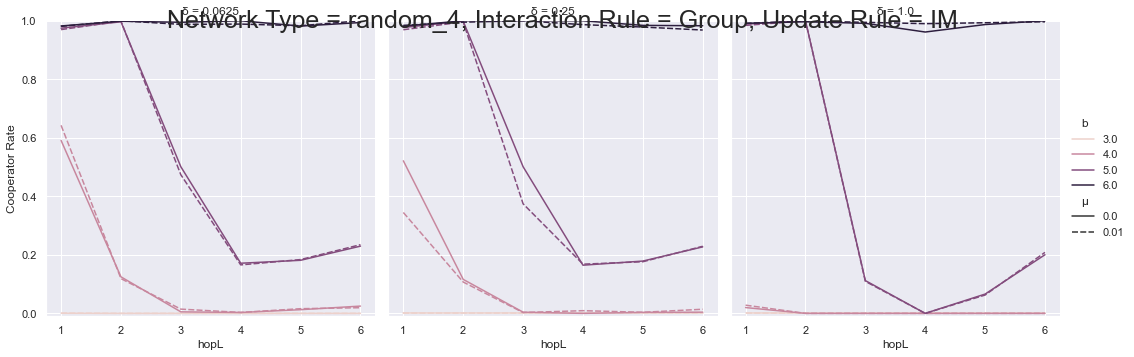

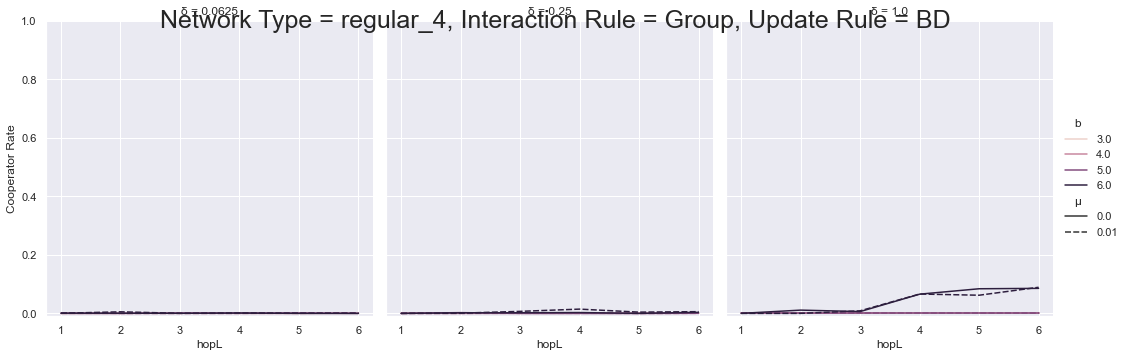

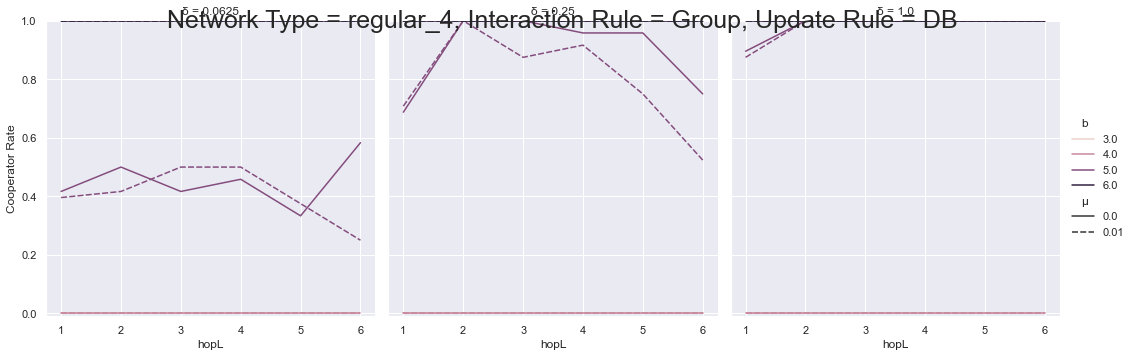

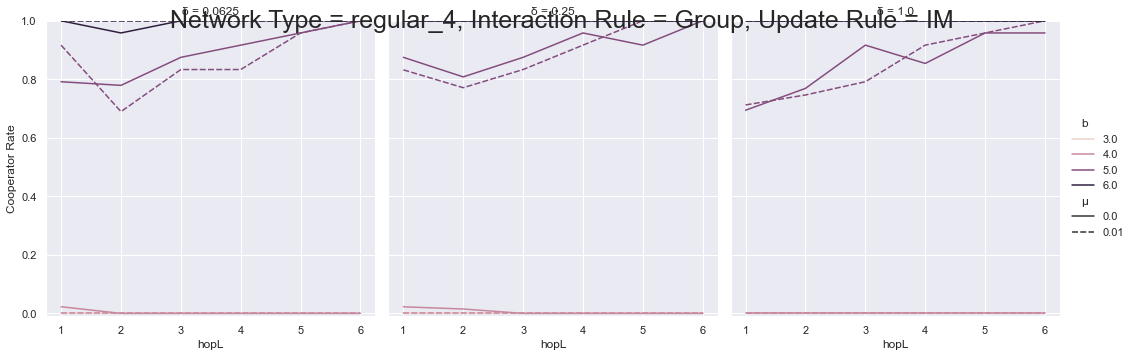

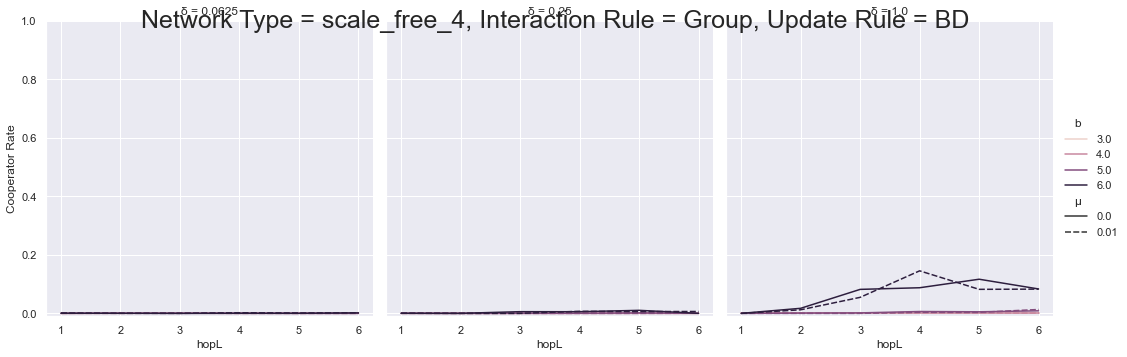

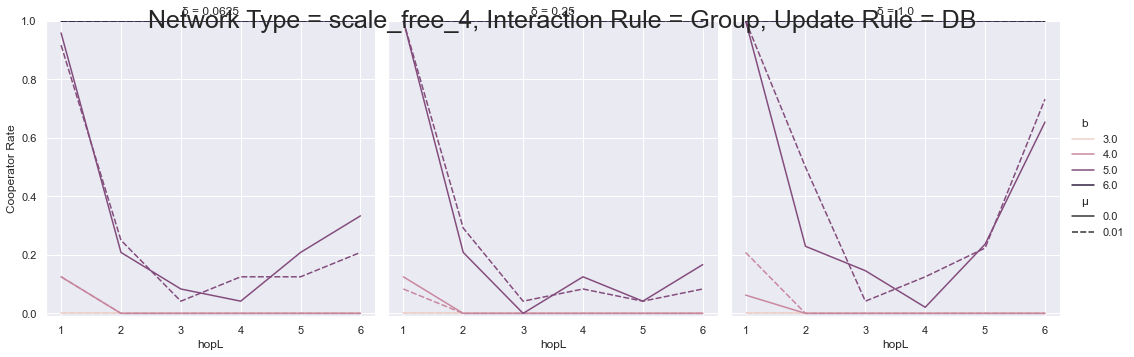

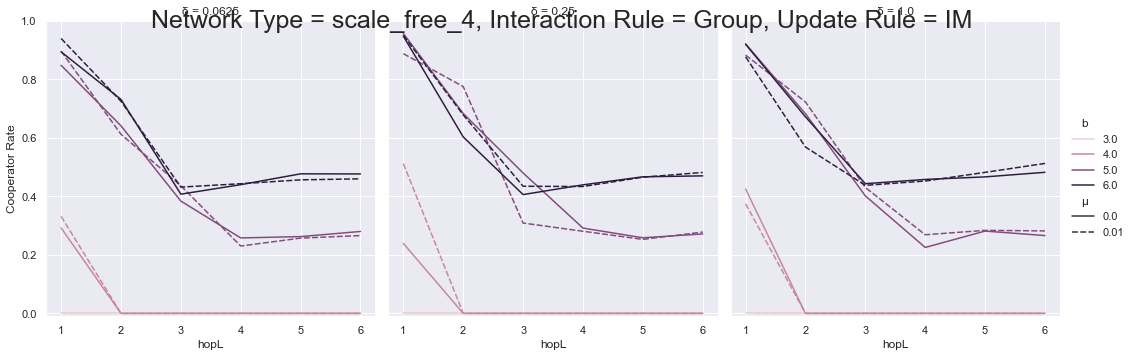

In [5]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[
        (df.network_type == network_type) &
        (df.interaction_rule == interaction_rule) &
        (df.update_rule == update_rule) &
        (df.hop_game == 1) &
        (df.hop_learning <= 6)
    ][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', col='δ', style='μ', data=_df)
    g.set_axis_labels('hopL', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Interaction Rule = {}, Update Rule = {}'.format(network_type, interaction_rule, update_rule), size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))

### プレゼン用グラフ

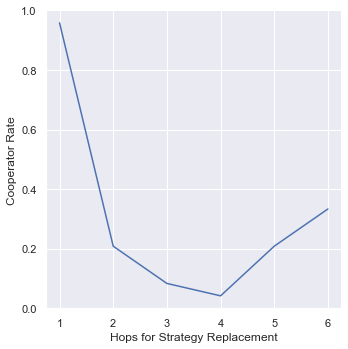

In [6]:
df_for_presentation = df[
    (df.network_type == 'scale_free_4') & (df.interaction_rule == 'Group') & (df.update_rule == 'DB') &
    (df.b == 5) & (df.δ == 0.0625) & (df.hop_game == 1) & (df.μ == 0.0)]

_df = df_for_presentation[['hop_learning', 'cooperator_rate']].reset_index(drop=True)
g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', data=_df)
g.set_axis_labels('Hops for Strategy Replacement', 'Cooperator Rate')
g.set(ylim=(0, 1))

# Pairwise Interaction

In [33]:
%%time
dir_names = [
#     '20221022_124004', '20221022_125238', '20221022_155000',
    'clean_data',
]
file_list = list(itertools.chain.from_iterable([glob.glob('../data/{}/*.csv'.format(dir_name)) for dir_name in dir_names]))
df_list = [load_df(file) for file in file_list]
df_raw = pd.concat(df_list).reset_index(drop=True)
df = df_raw.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': [len, np.mean, np.std]}).reset_index()
df.columns = GROUPBY_COLUMNS + ['trial', 'cooperator_rate', 'std']
df

CPU times: user 303 ms, sys: 30.4 ms, total: 333 ms
Wall time: 336 ms


,network_type,hop_game,hop_learning,b,μ,δ,interaction_rule,update_rule,trial,cooperator_rate,std
0,random_4,1,1,1.1,0.00,0.01,PairWise,BD,1,0.000261,NaN
1,random_4,1,1,1.1,0.00,0.10,PairWise,BD,1,0.000585,NaN
2,random_4,1,1,1.1,0.00,0.50,PairWise,BD,1,0.000041,NaN
3,random_4,1,1,1.1,0.00,1.00,PairWise,BD,1,0.000000,NaN
4,random_4,1,1,1.1,0.01,0.01,PairWise,BD,1,0.000201,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14779,scale_free_4,6,6,6.0,0.01,0.25,PairWise,BD,1,0.000003,NaN
14780,scale_free_4,6,6,6.0,0.01,1.00,Group,BD,1,0.000000,NaN
14781,scale_free_4,6,6,6.0,0.01,1.00,Group,DB,1,0.000000,NaN
14782,scale_free_4,6,6,6.0,0.01,1.00,Group,IM,1,0.000000,NaN


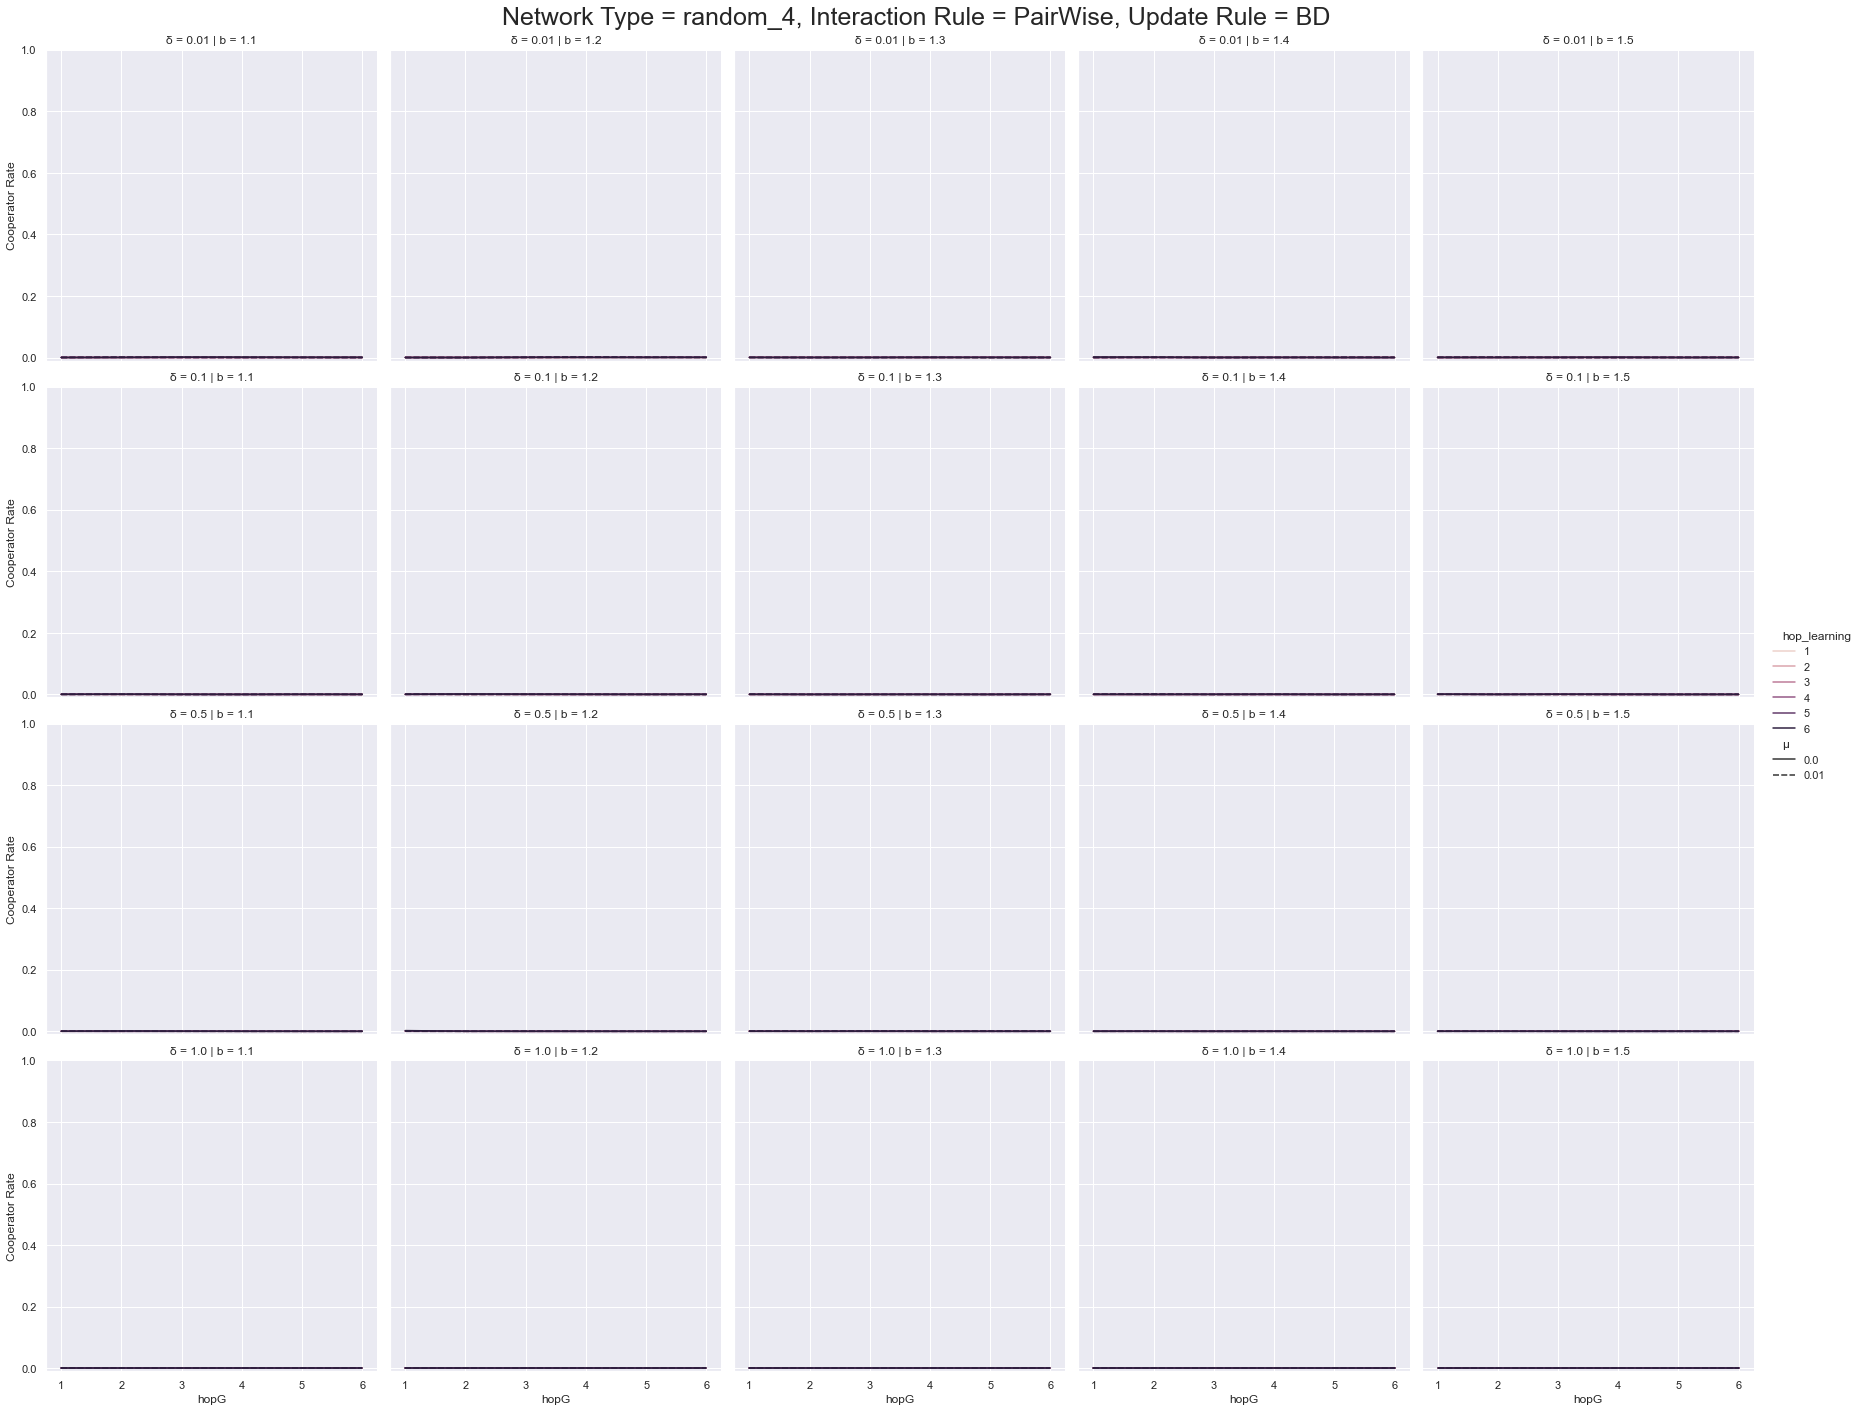

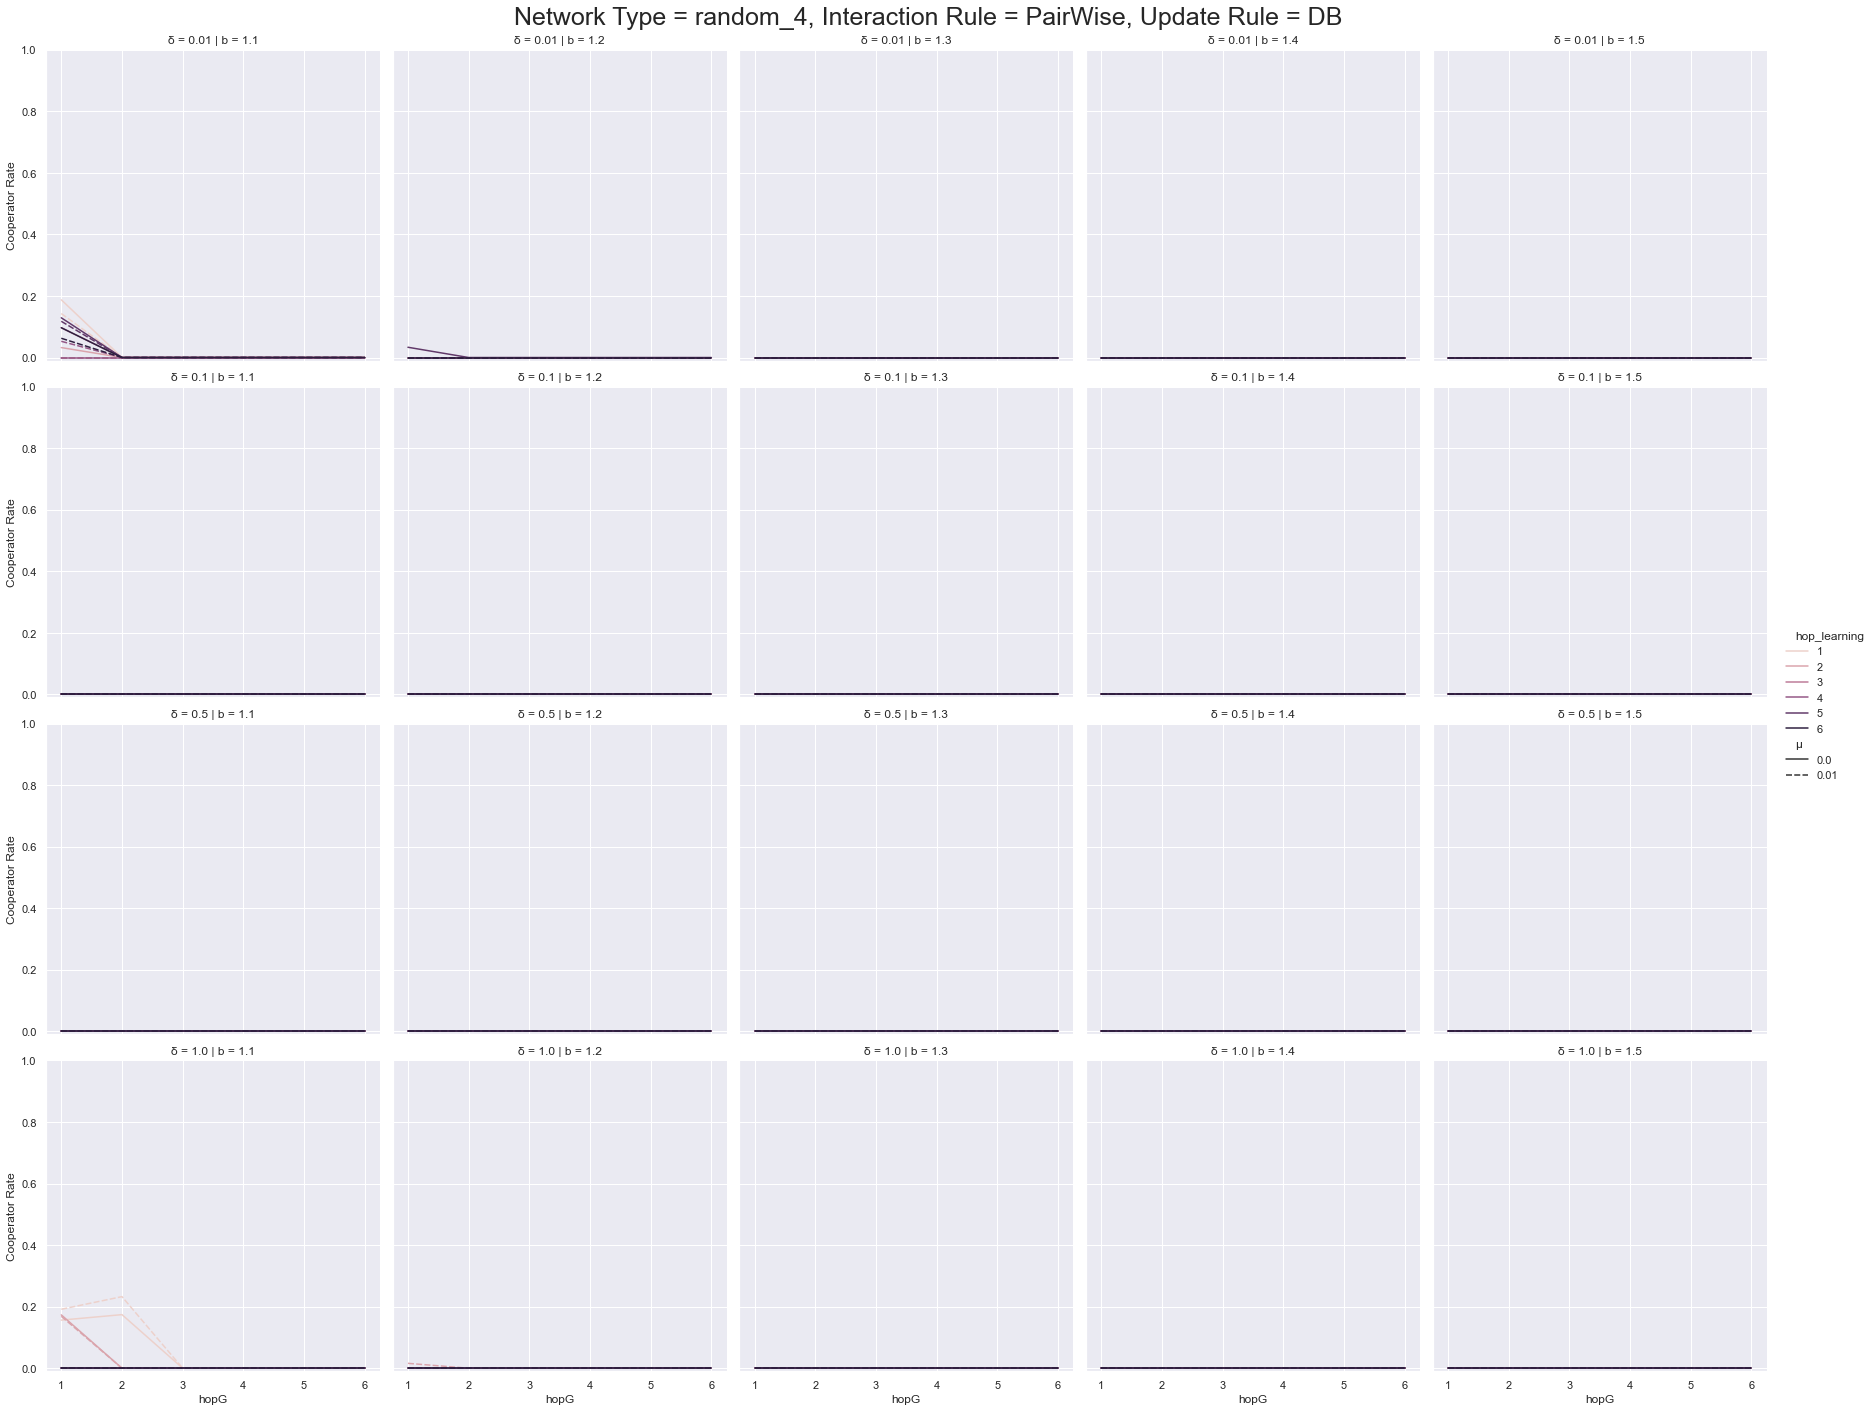

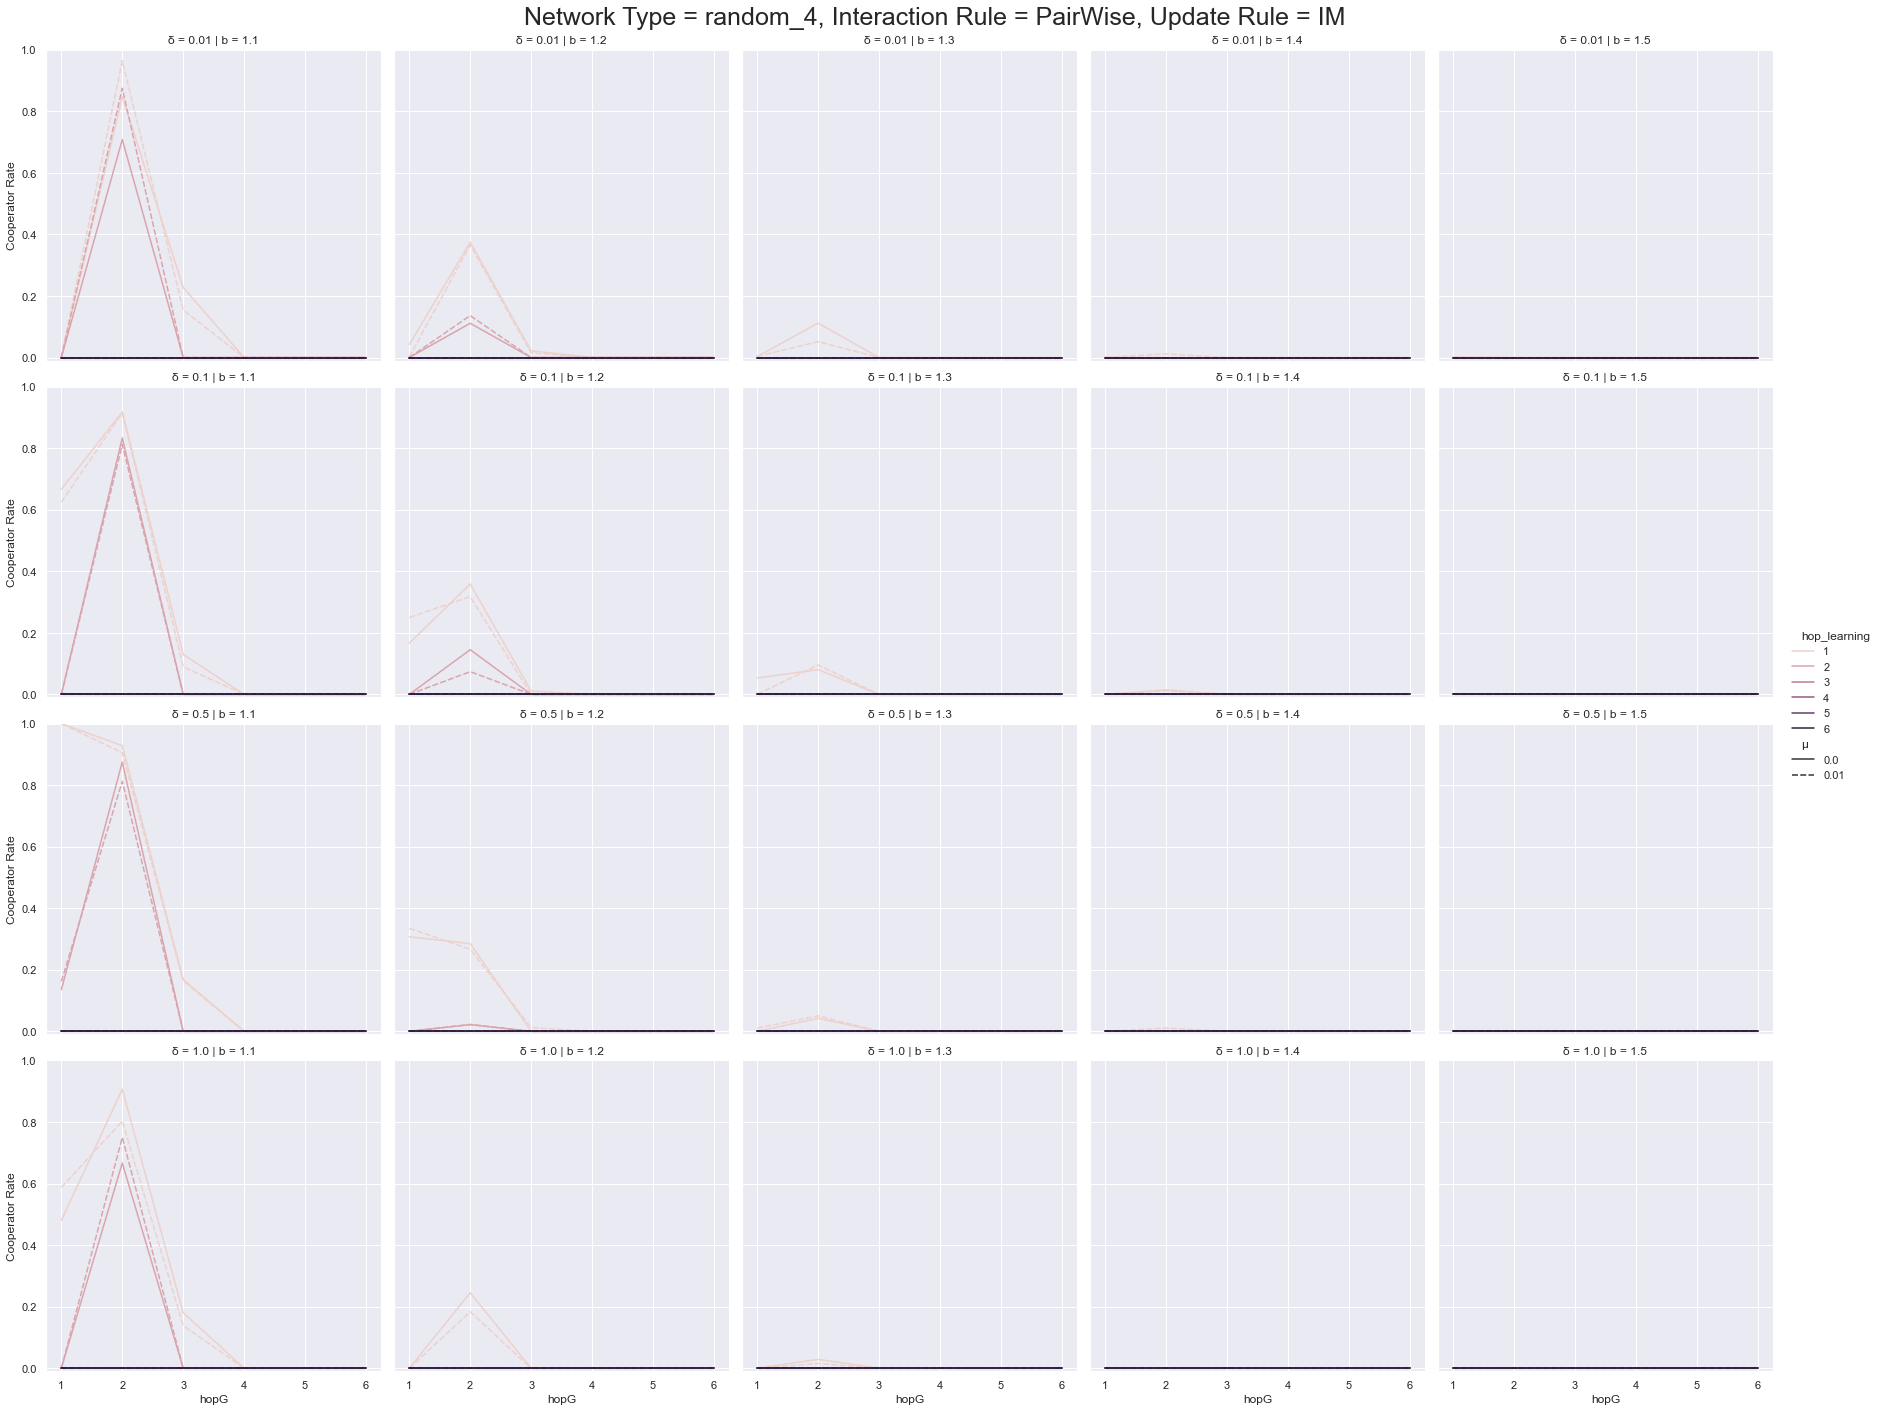

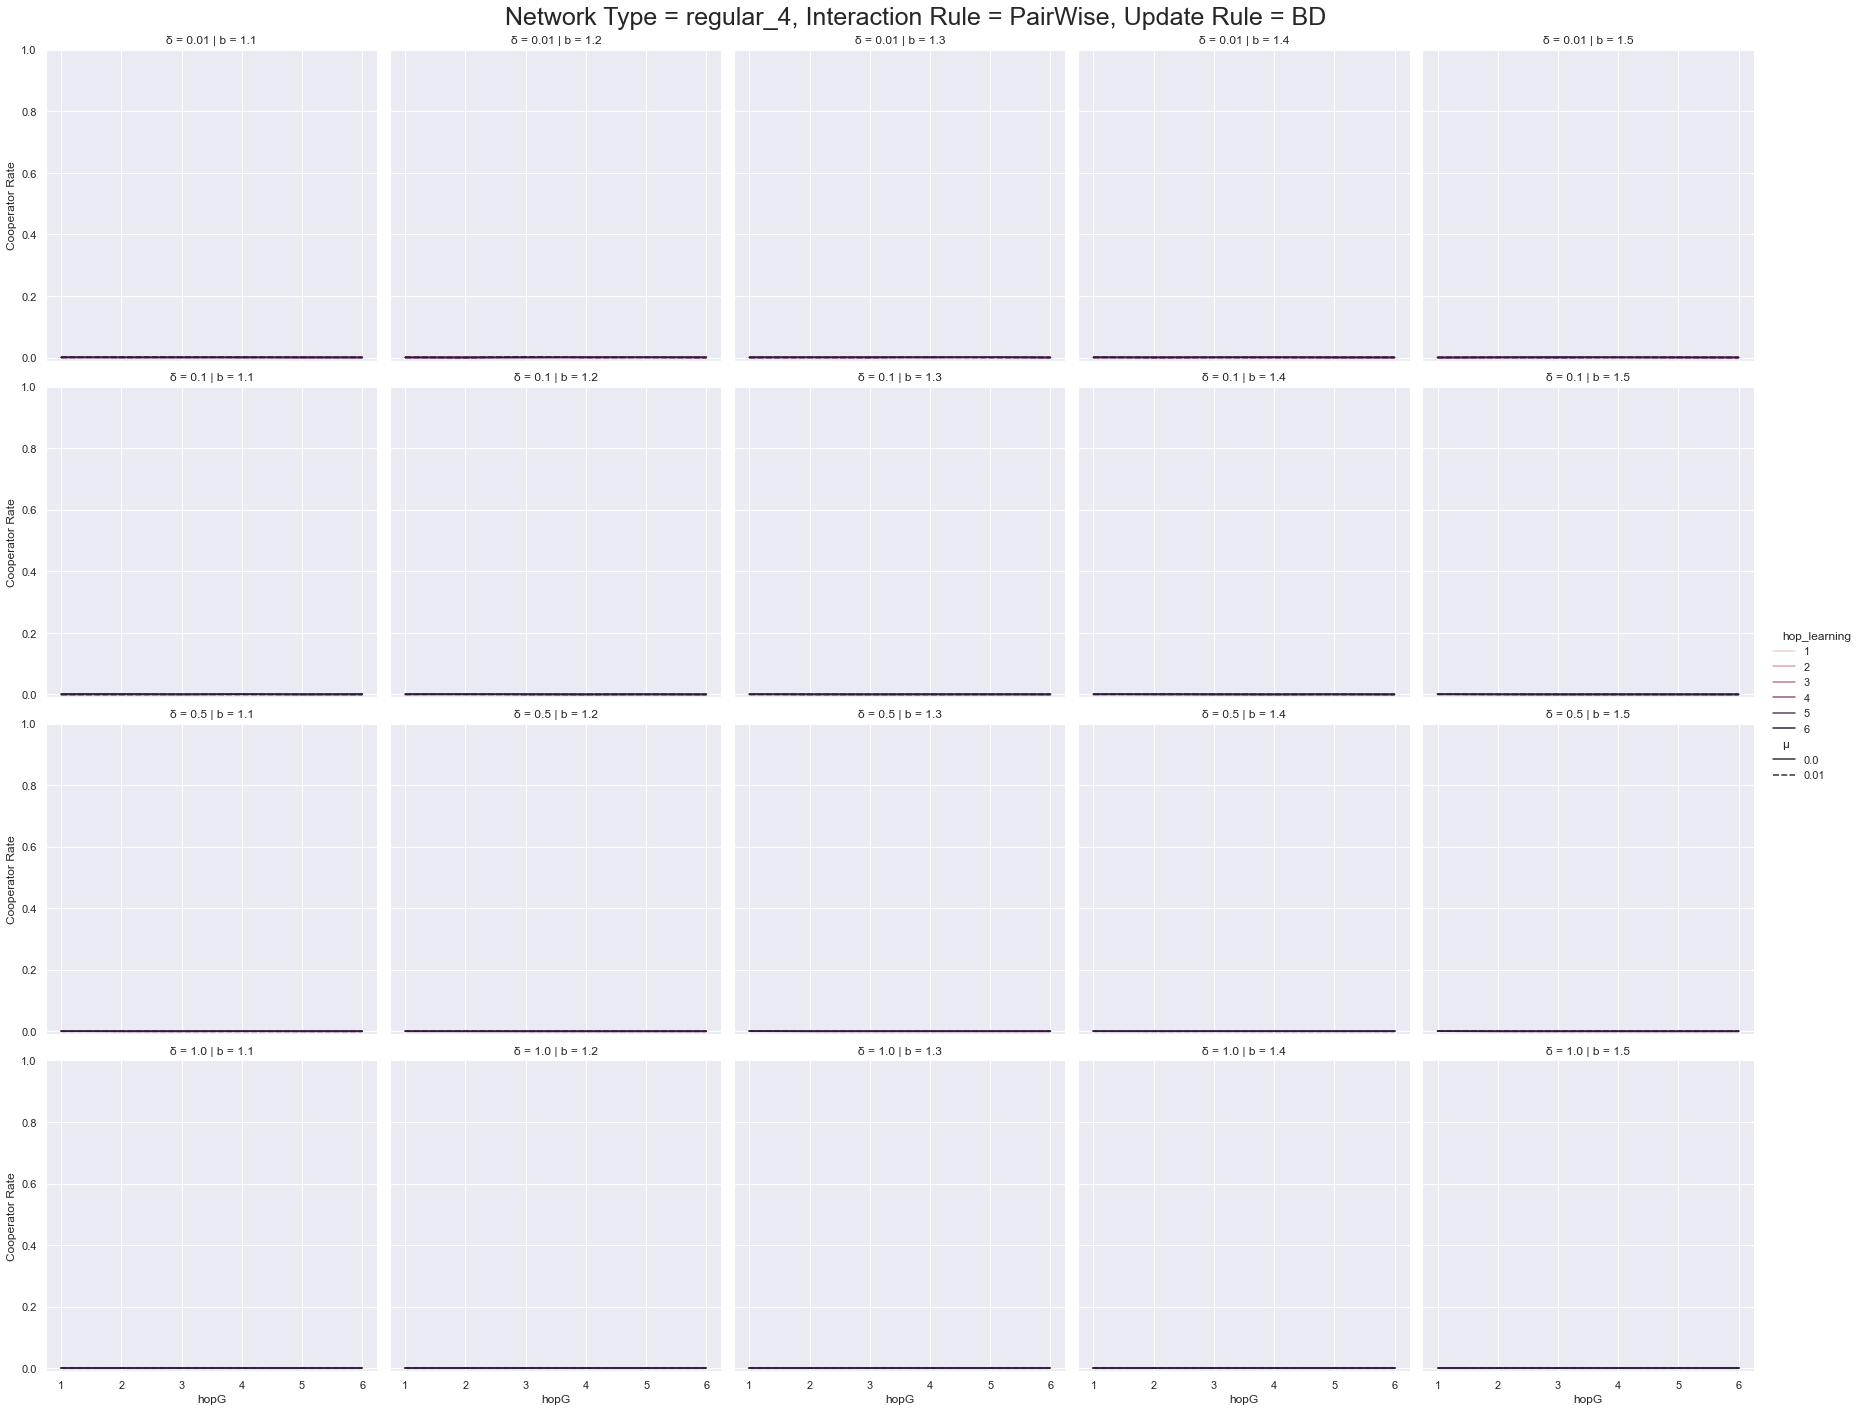

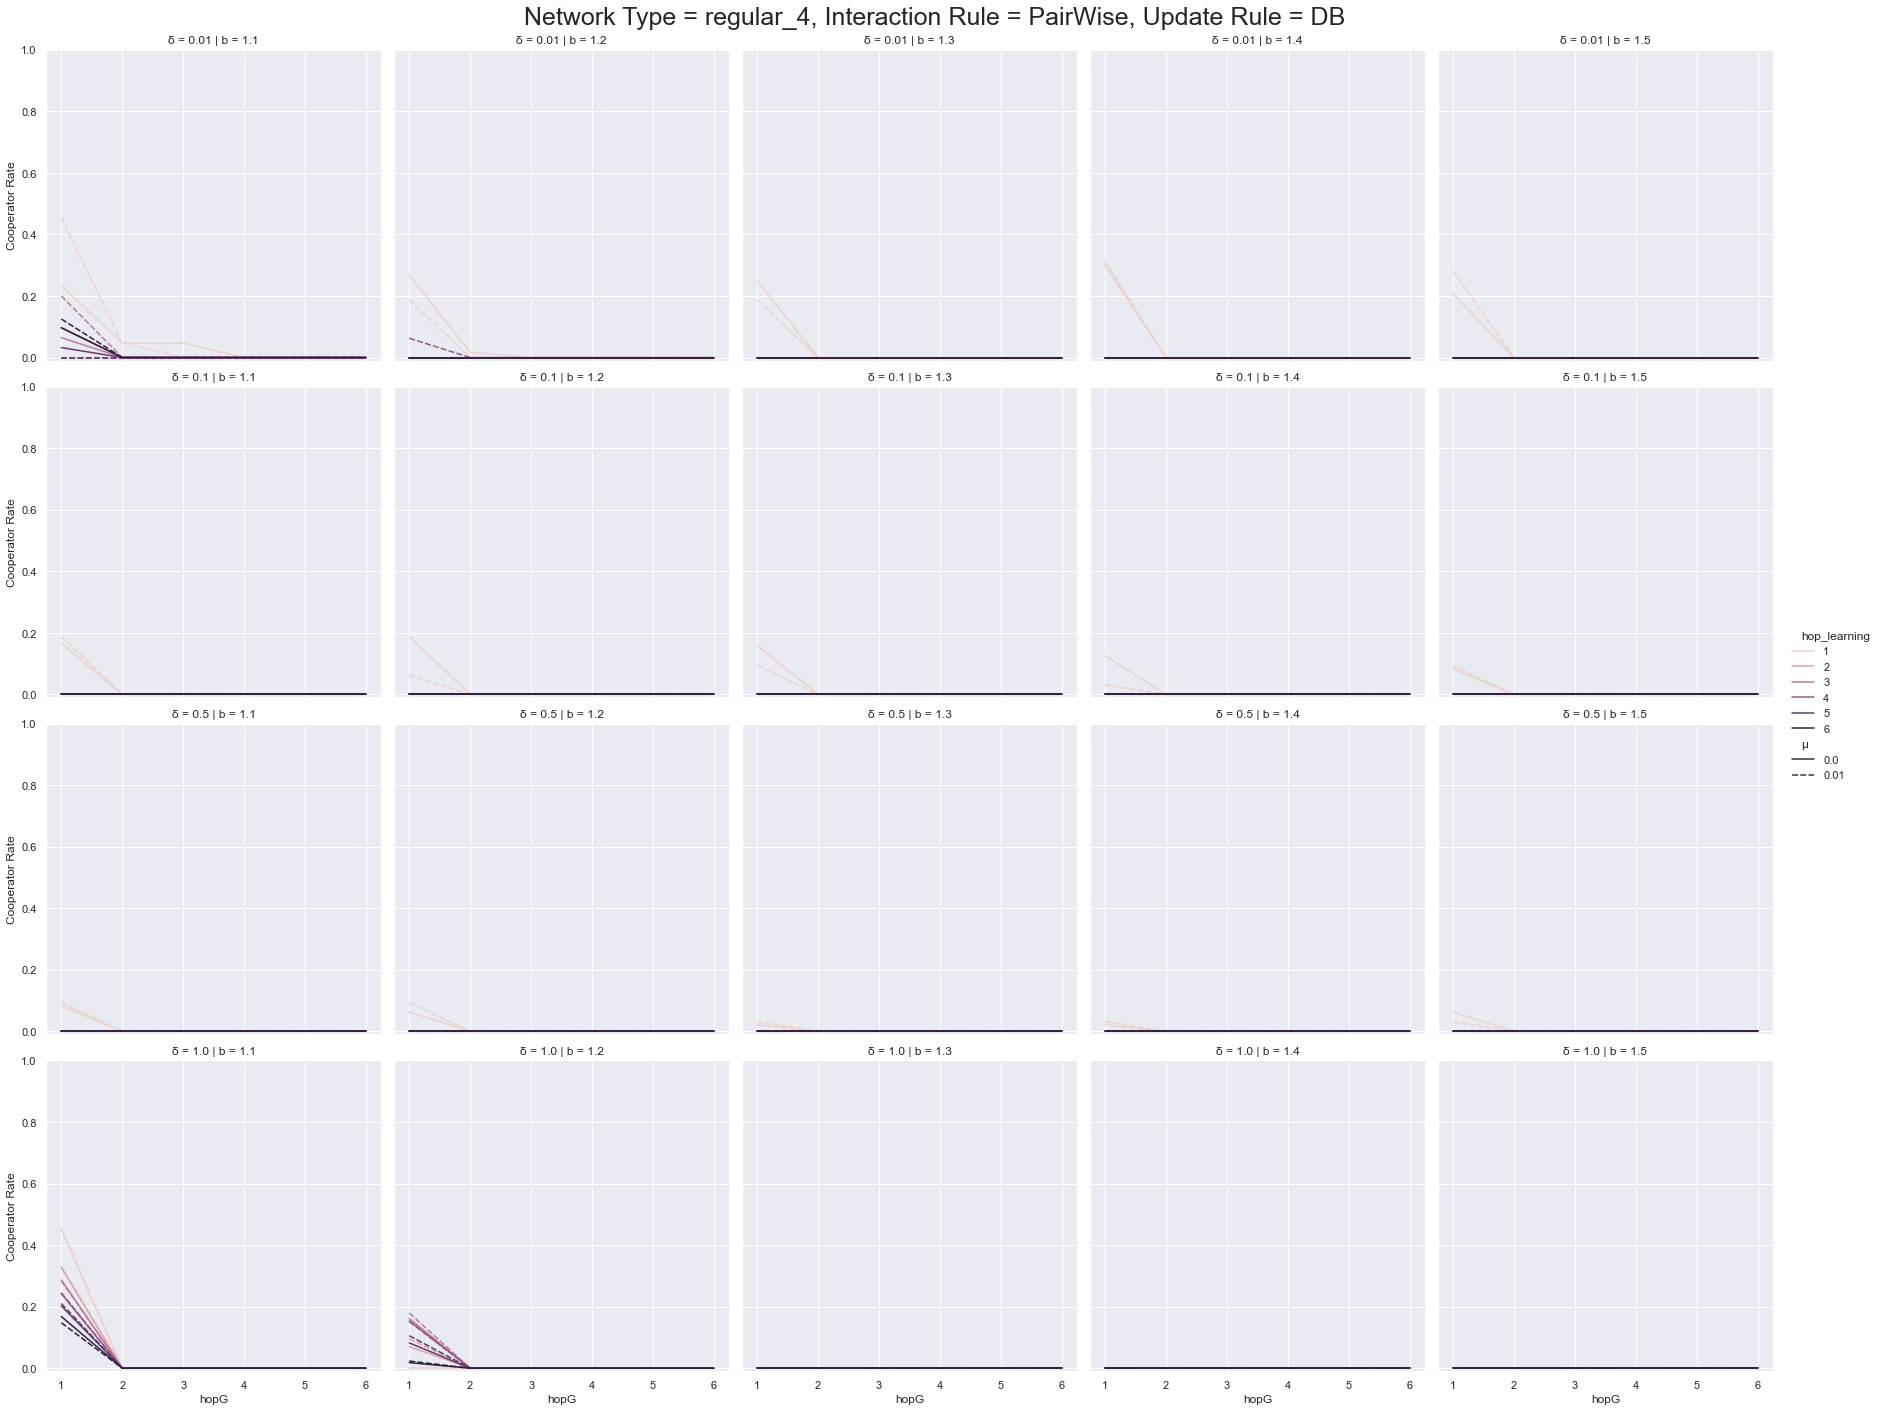

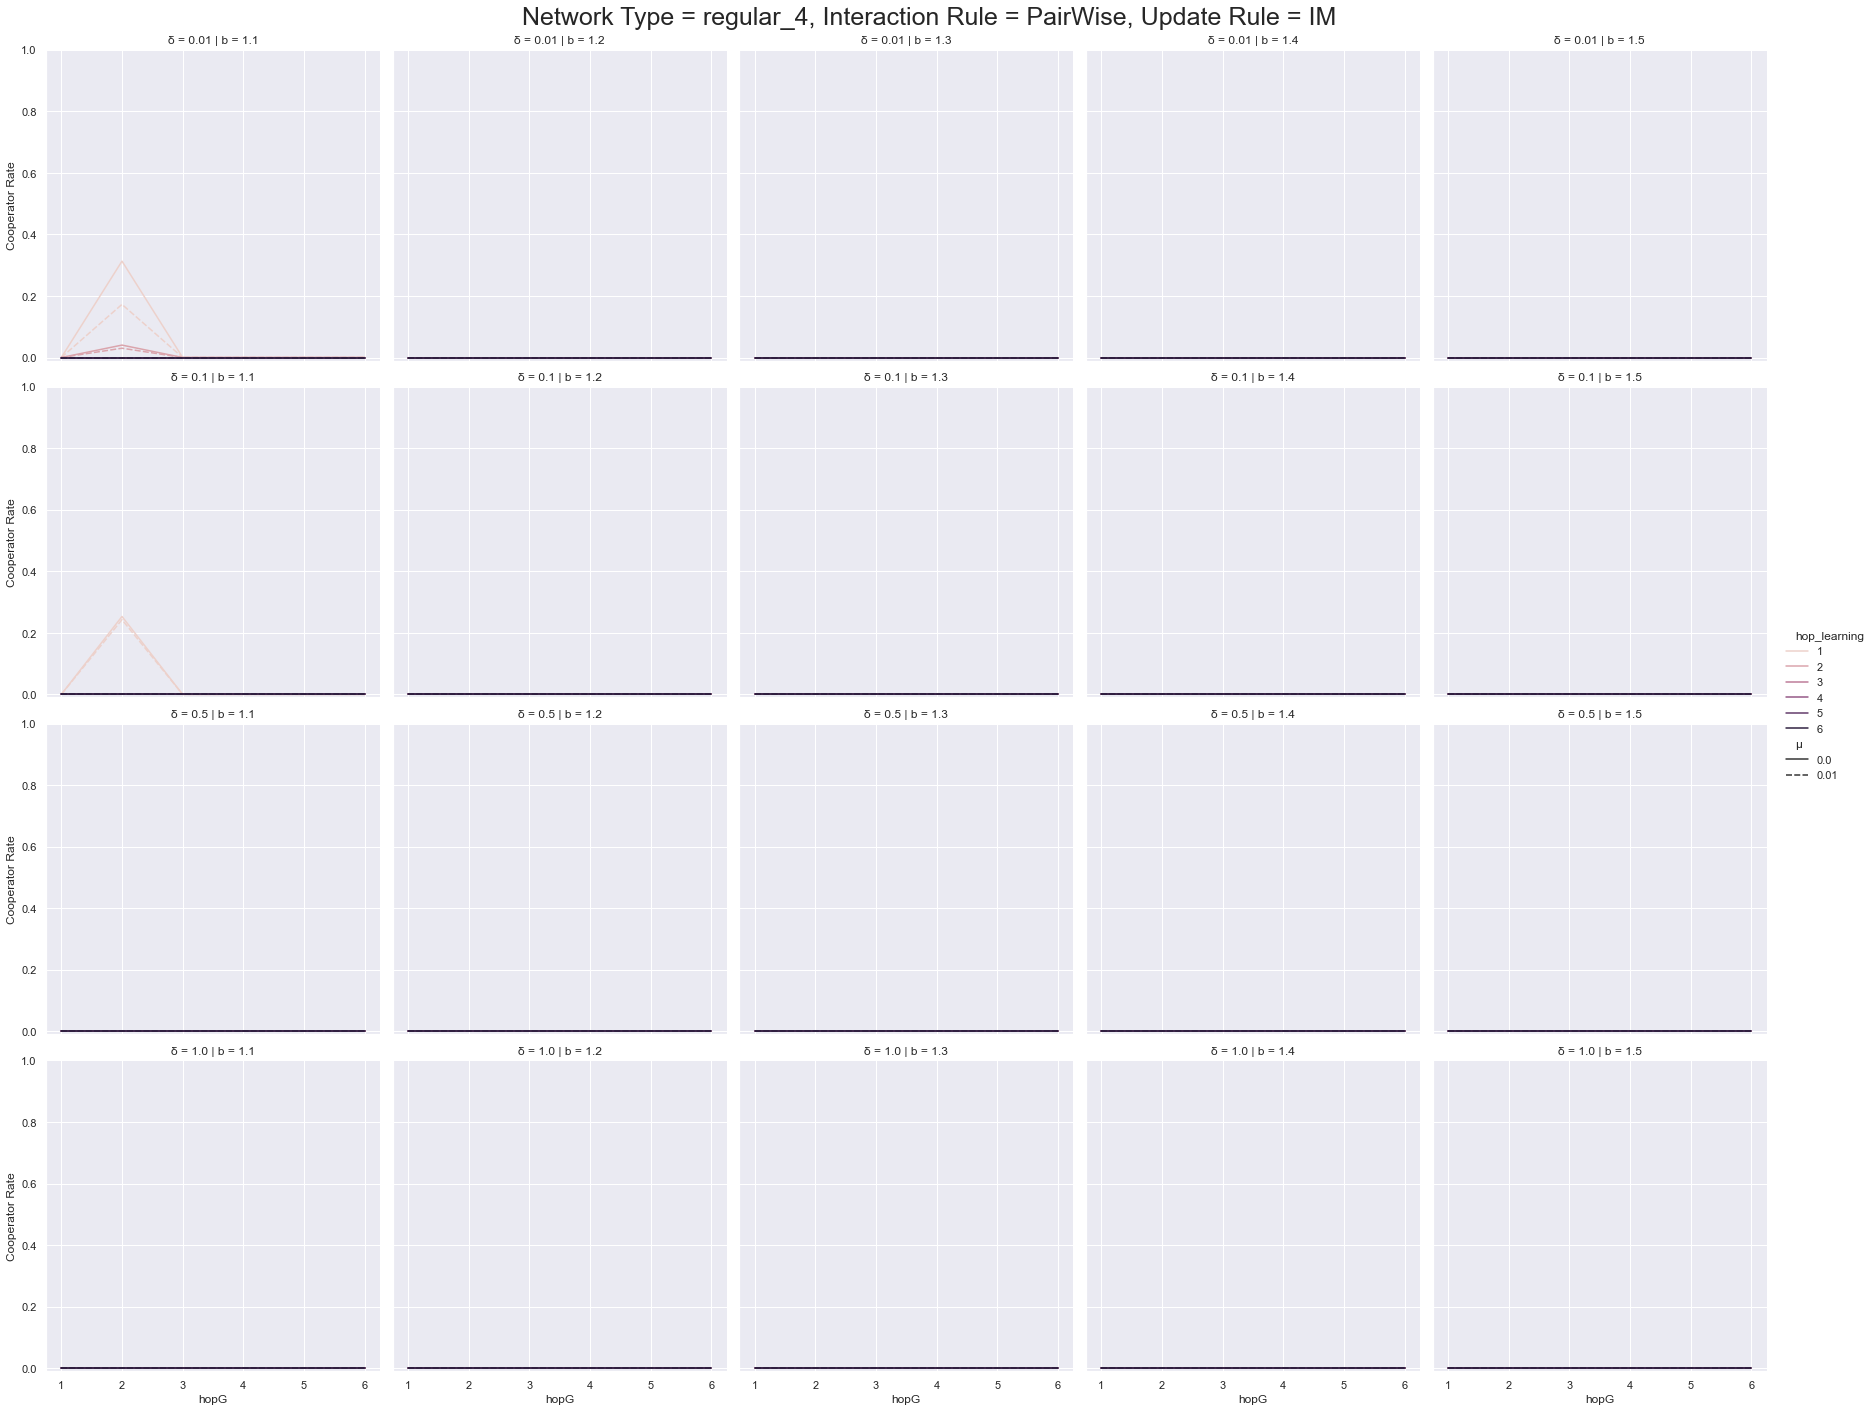

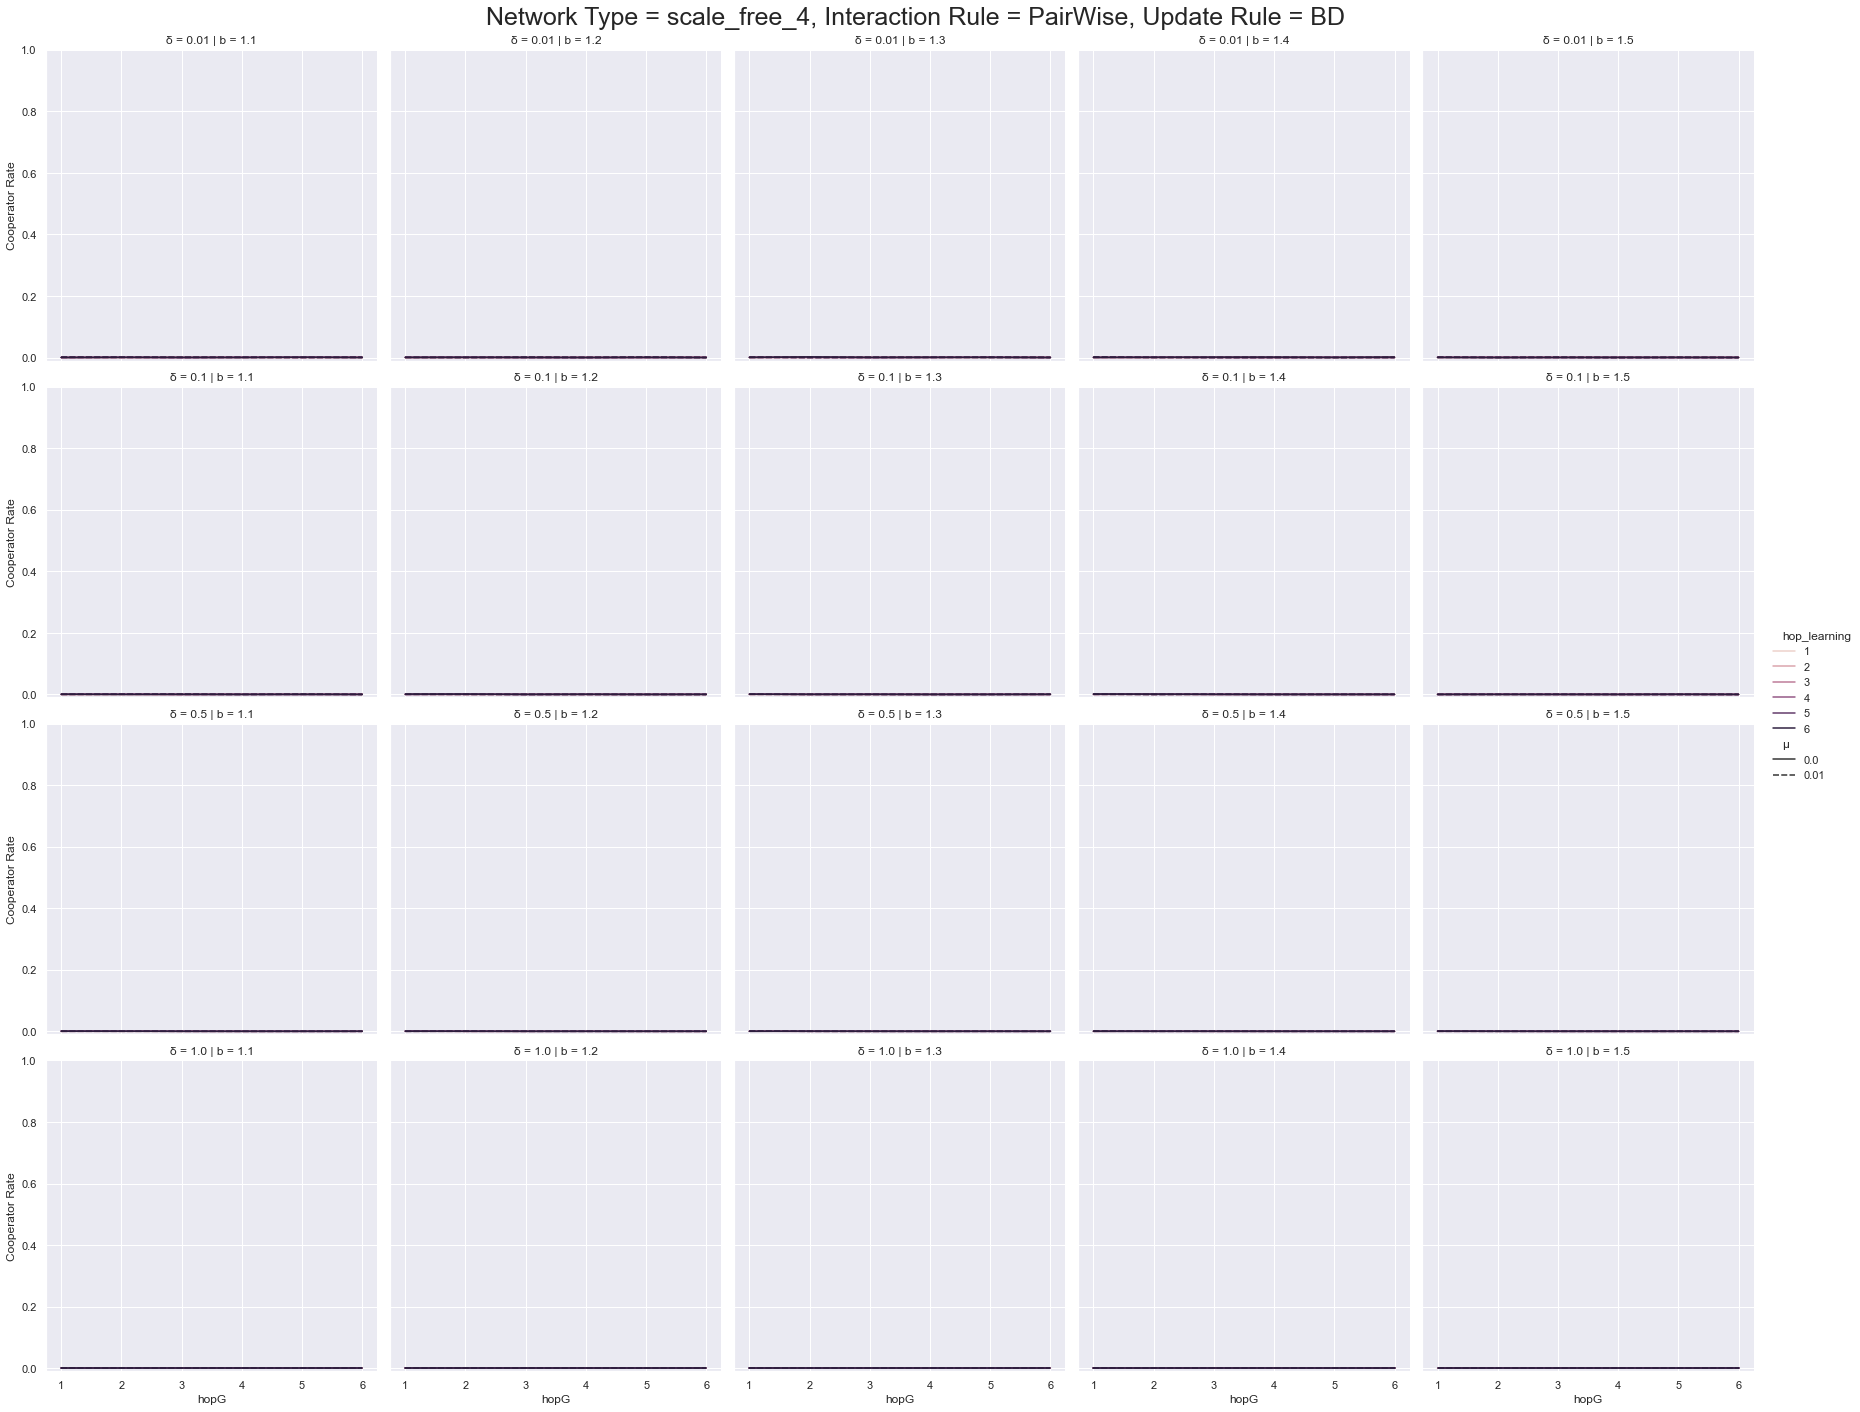

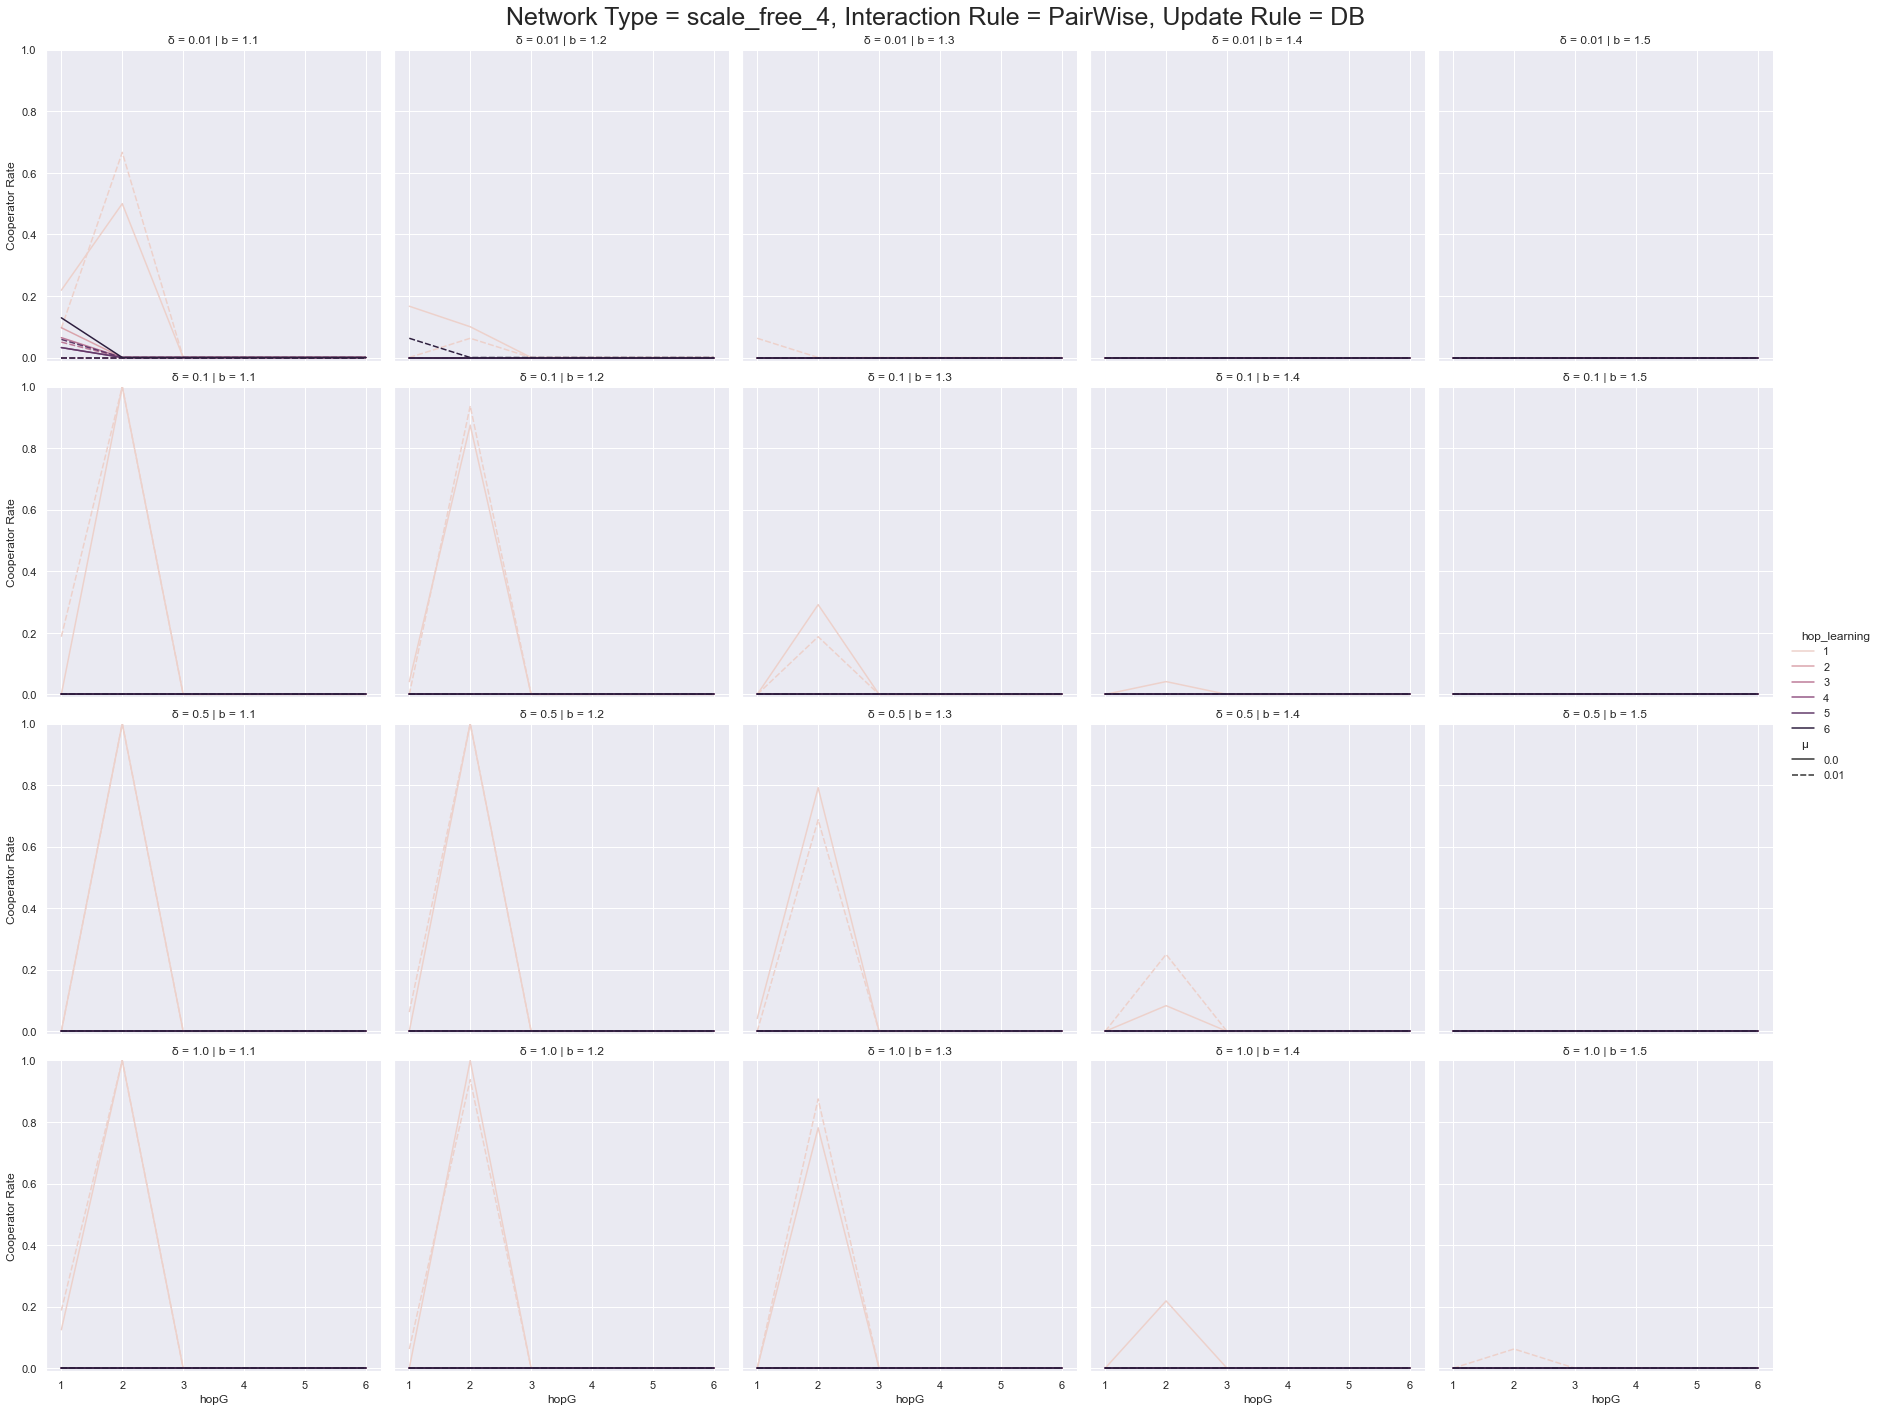

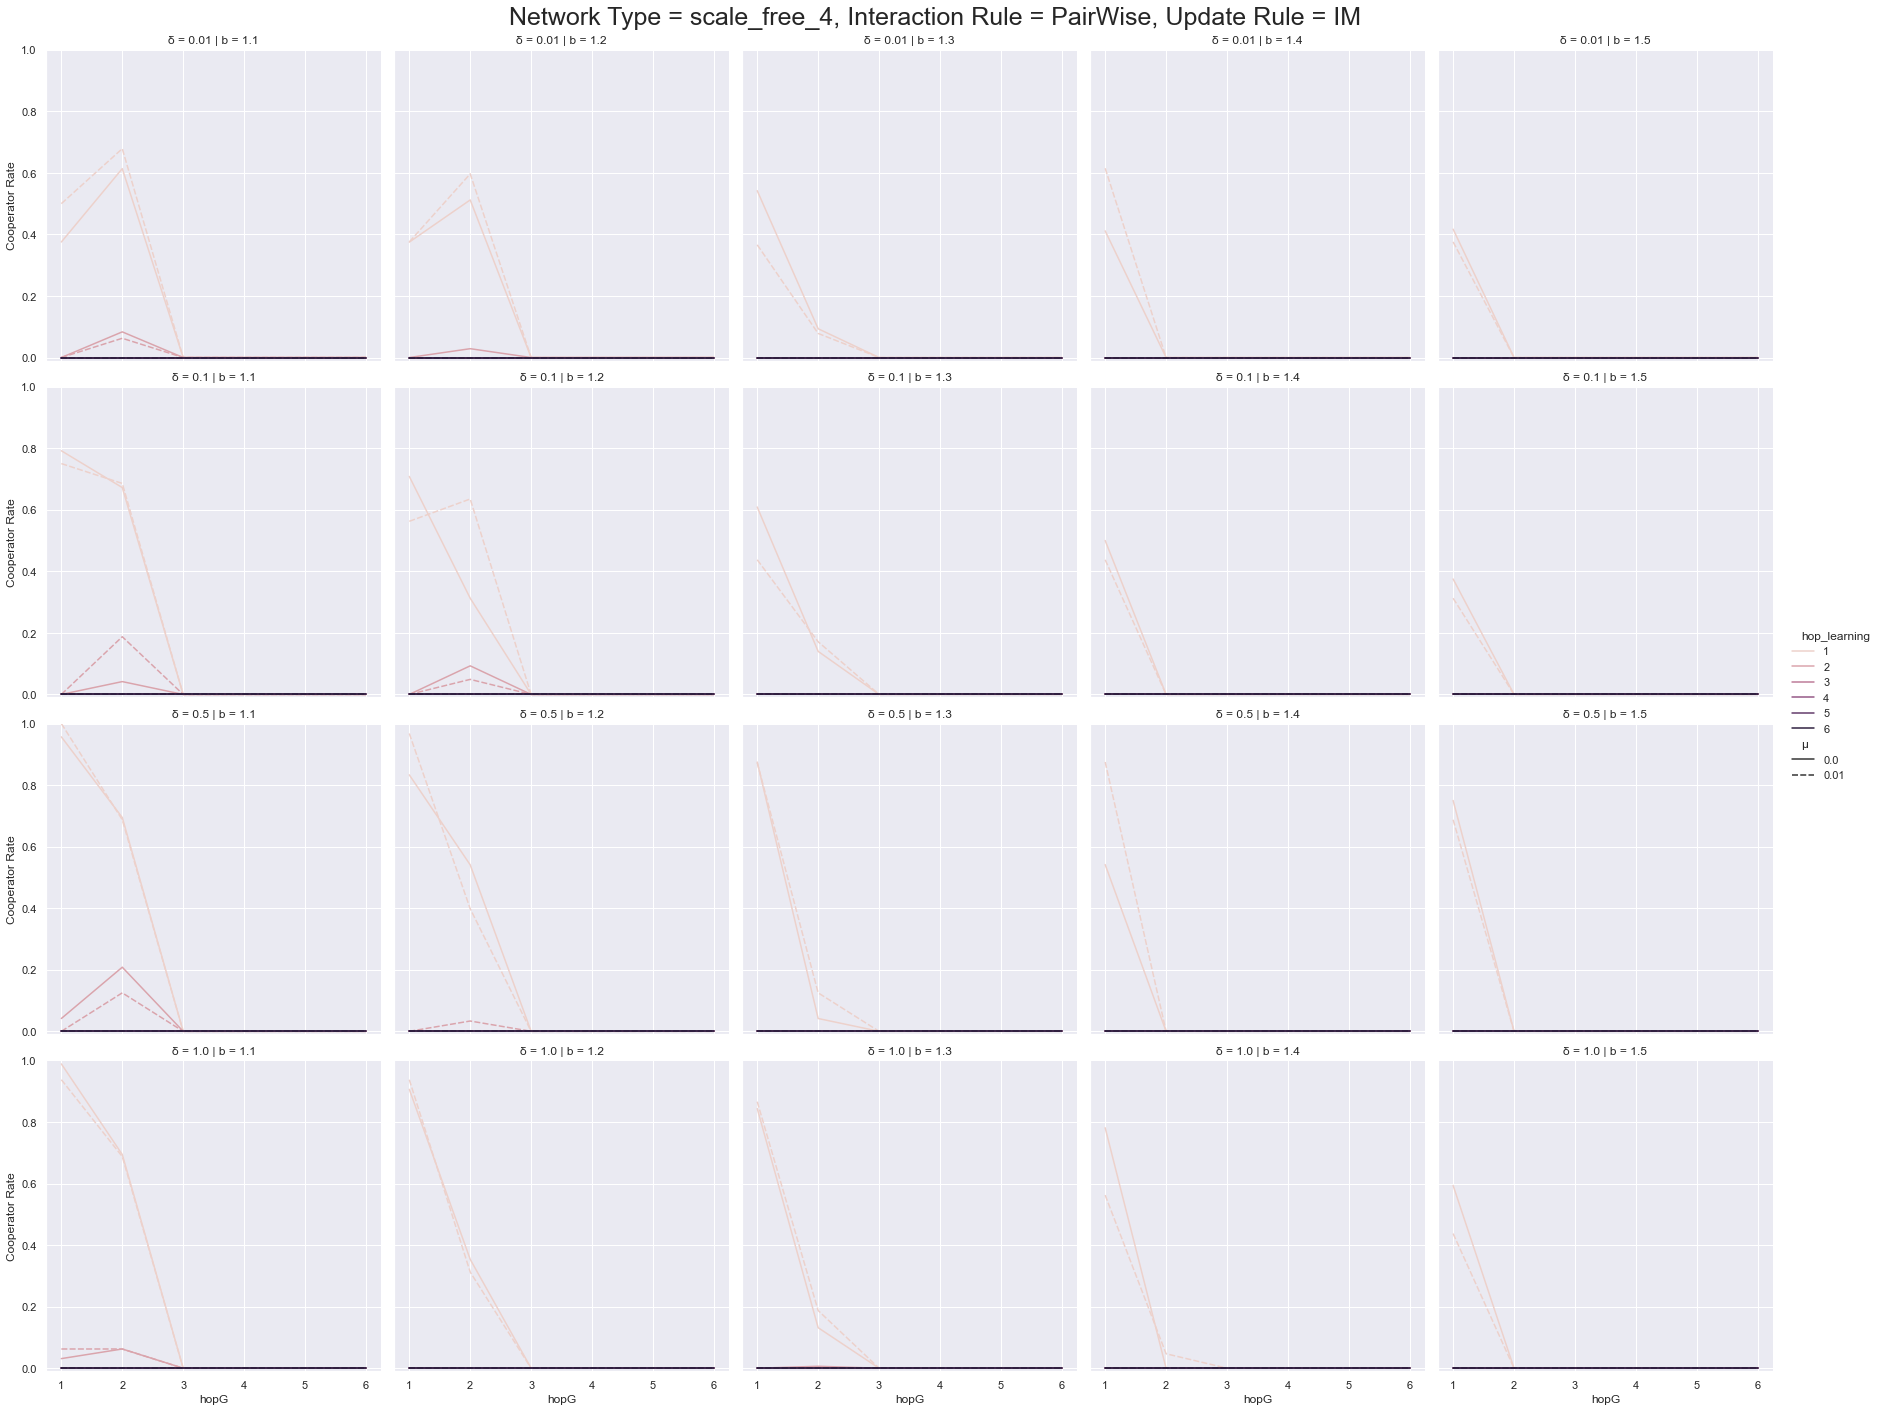

In [8]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', row='δ', col='b', style='μ', data=_df)
    g.set_axis_labels('hopG', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Interaction Rule = {}, Update Rule = {}'.format(network_type, interaction_rule, update_rule), size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))

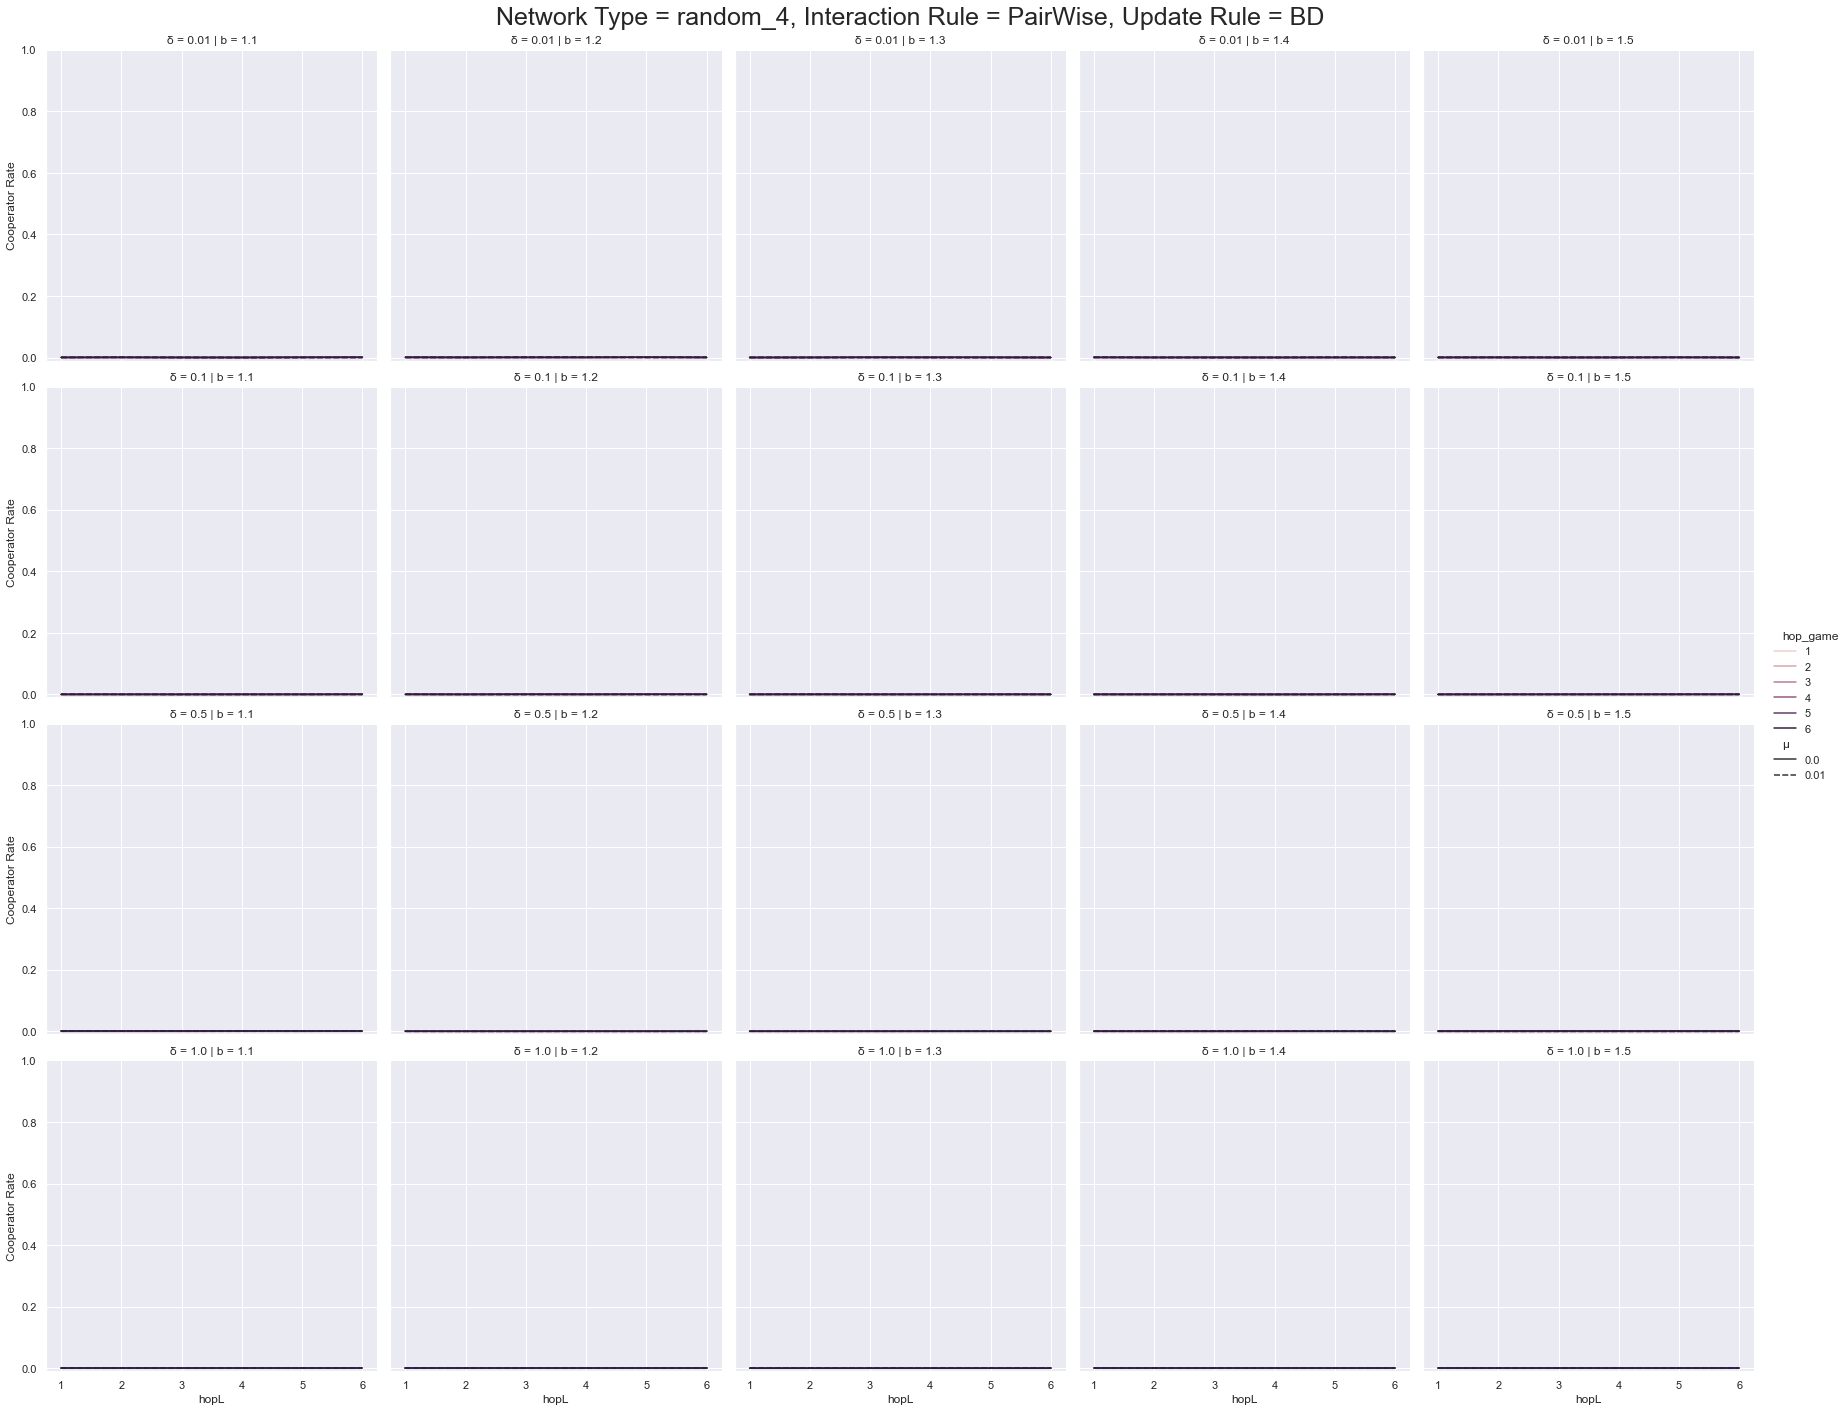

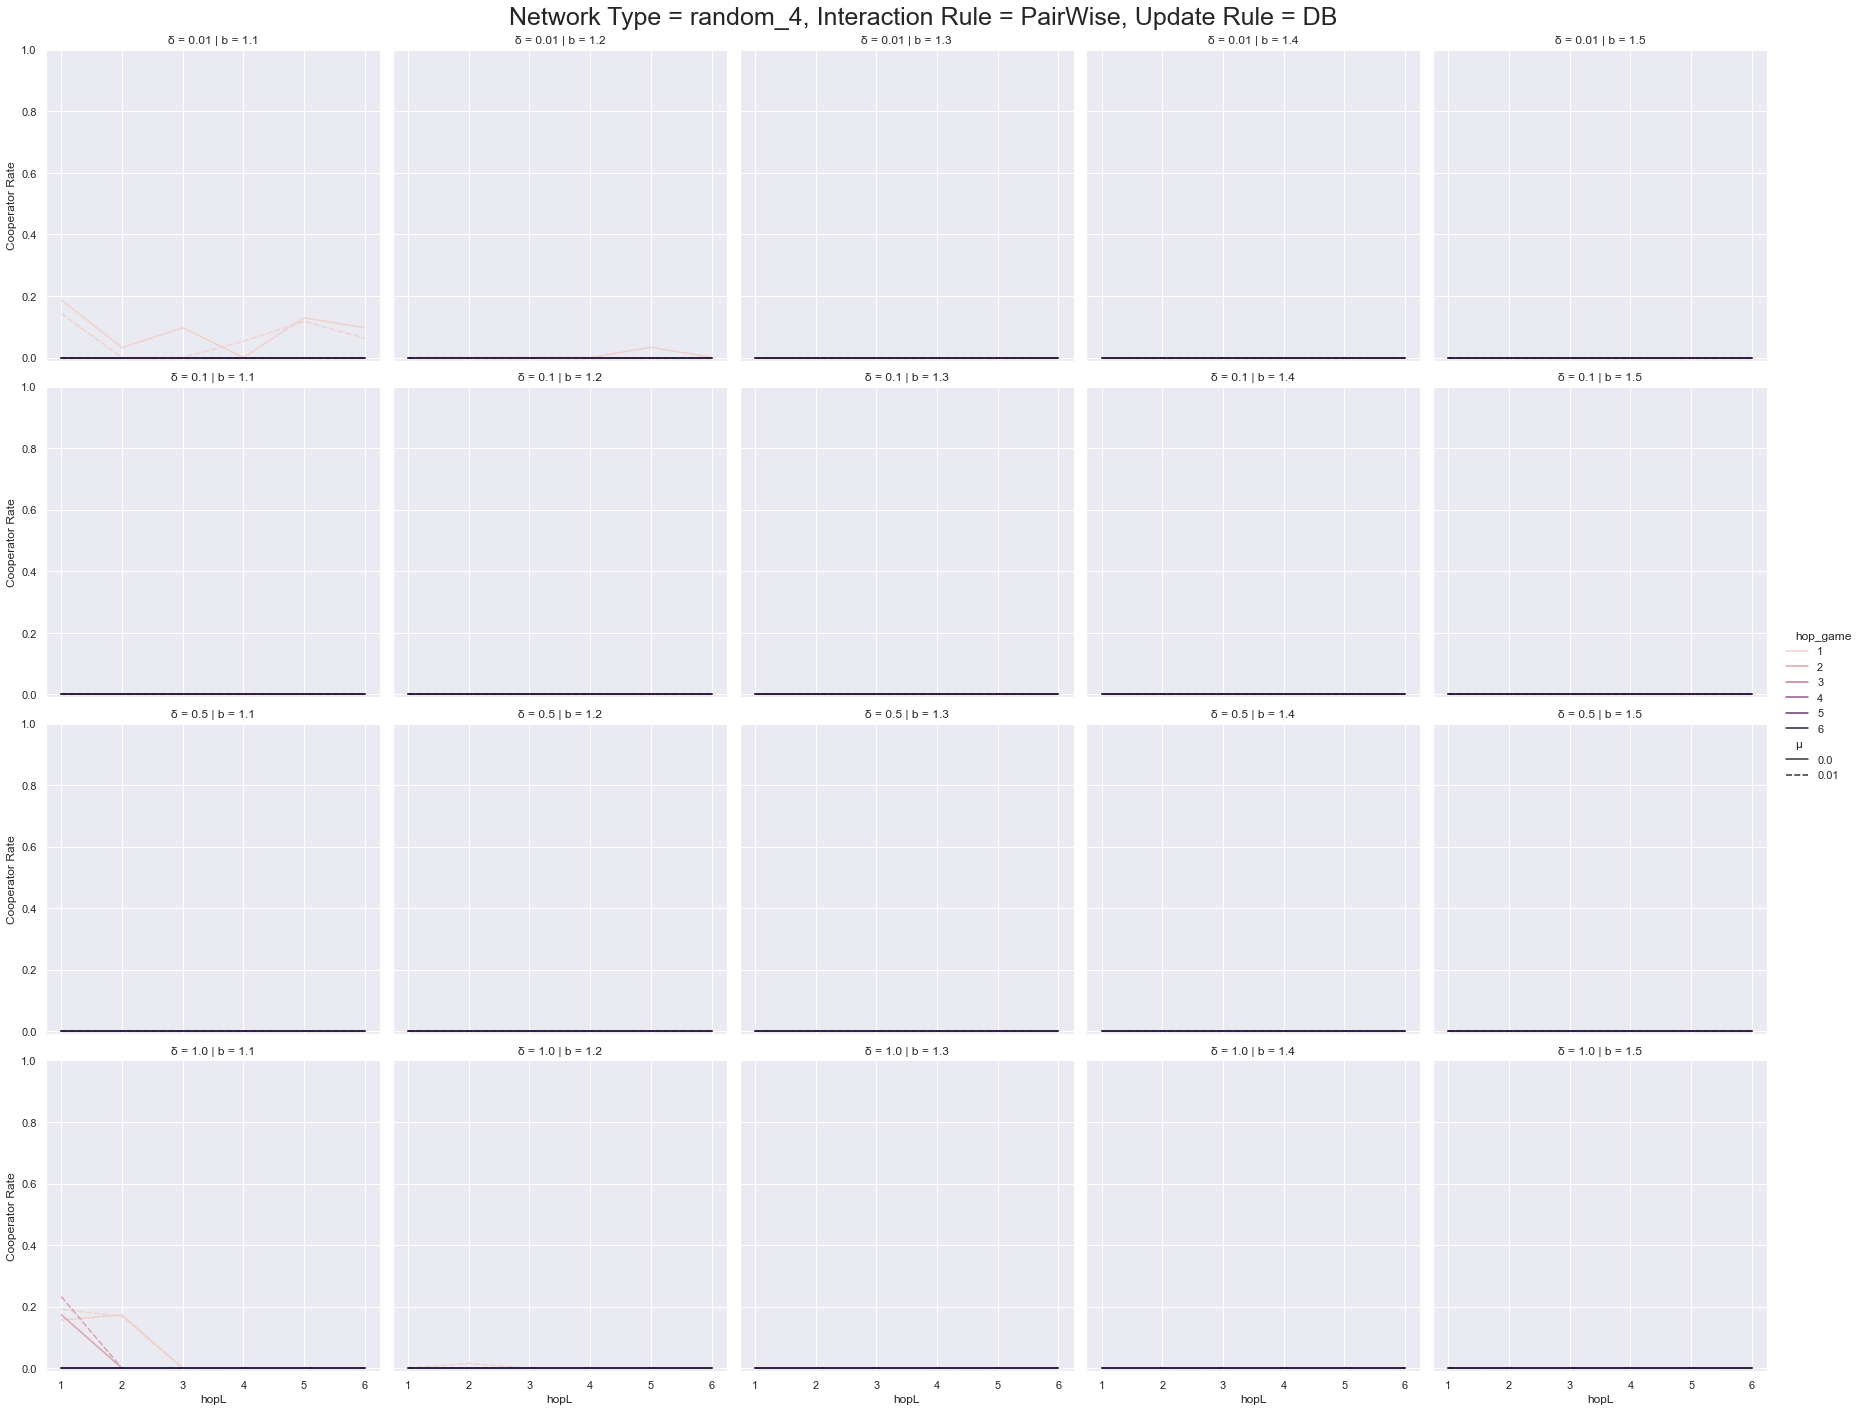

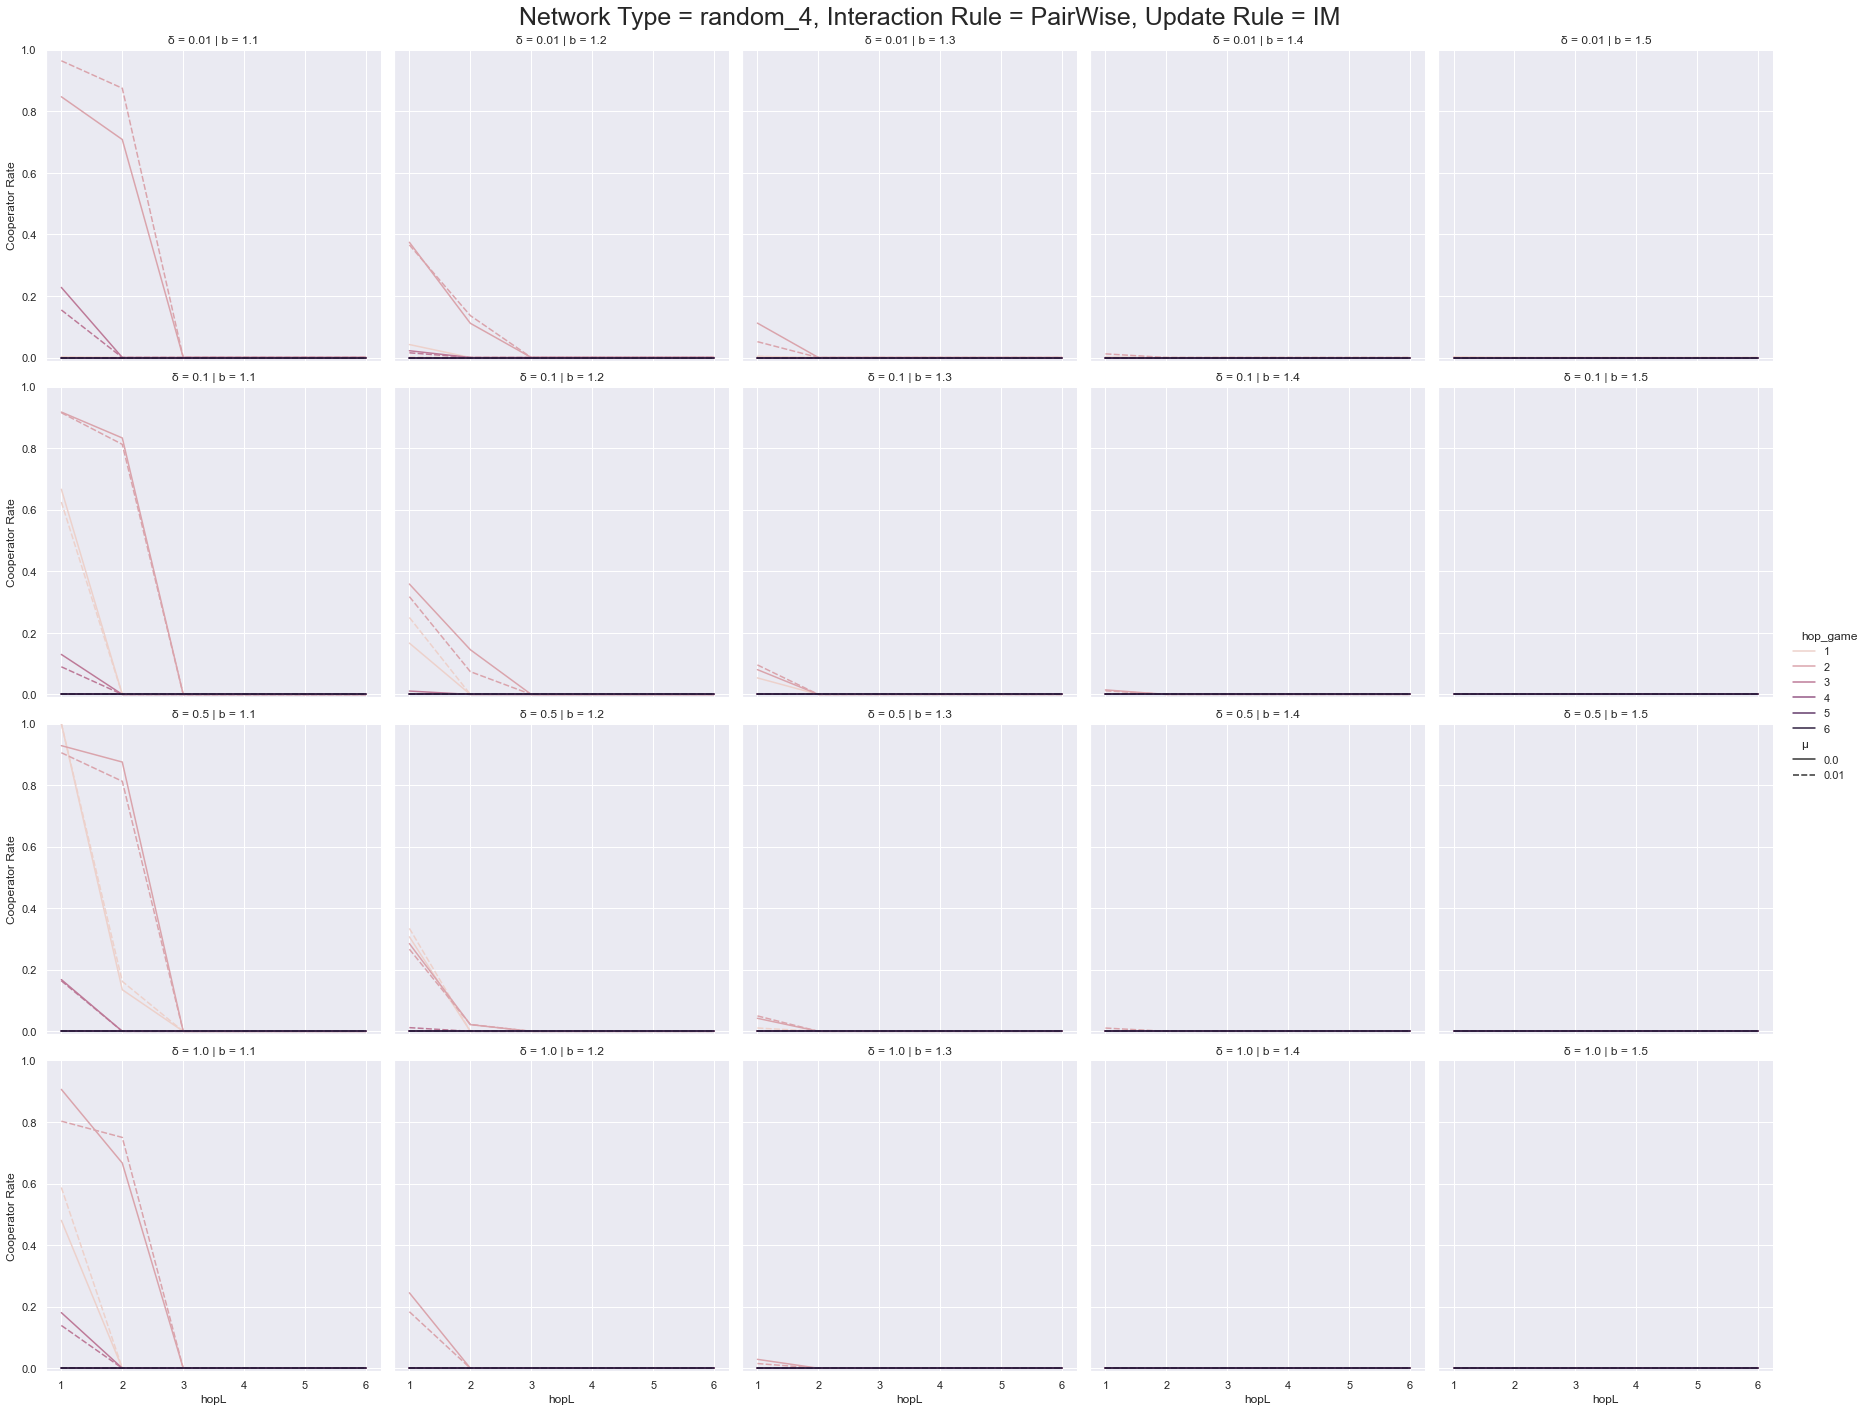

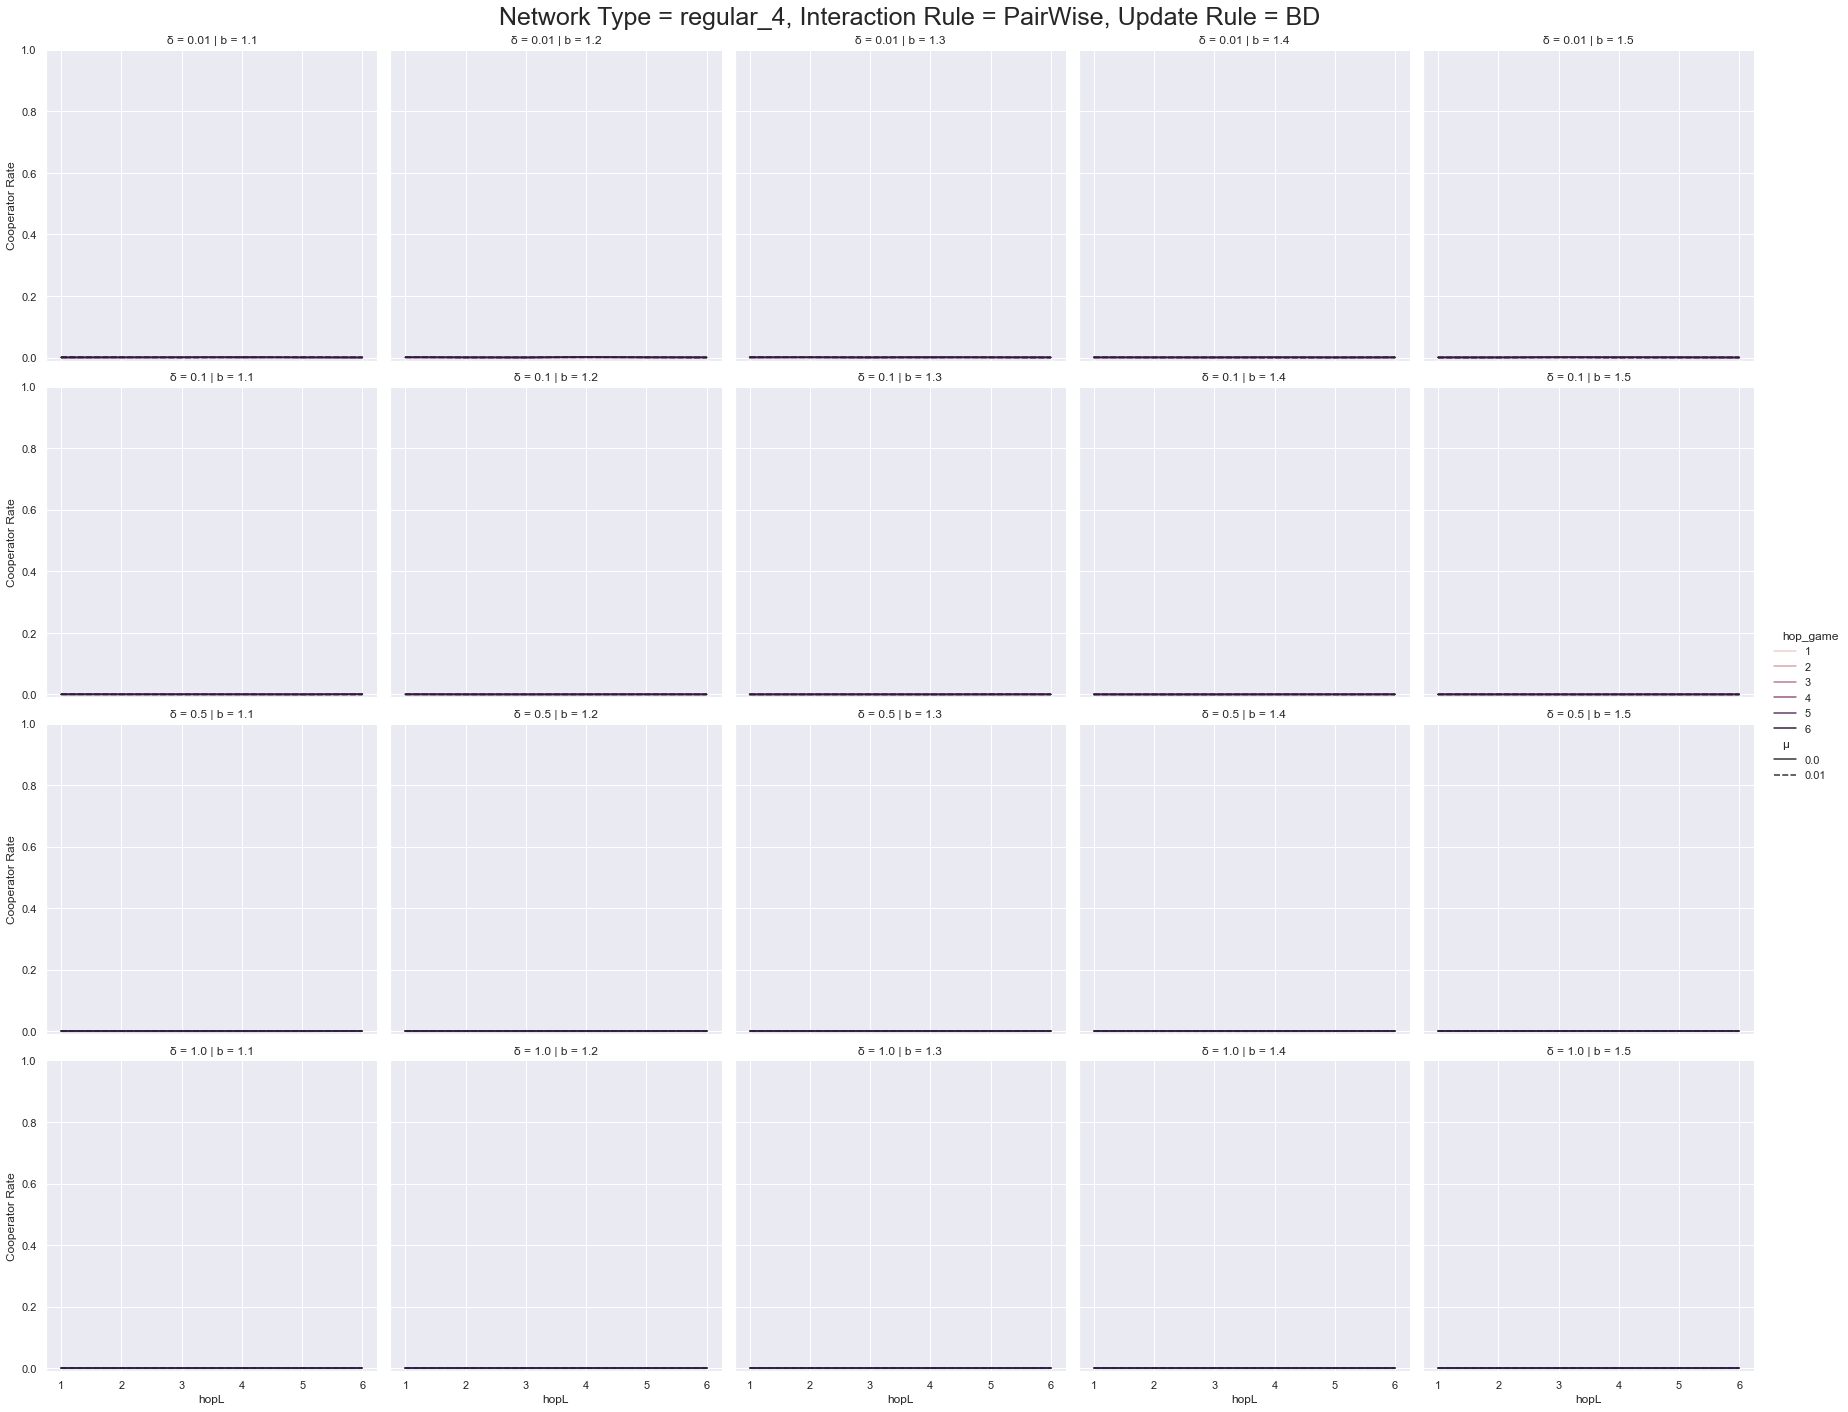

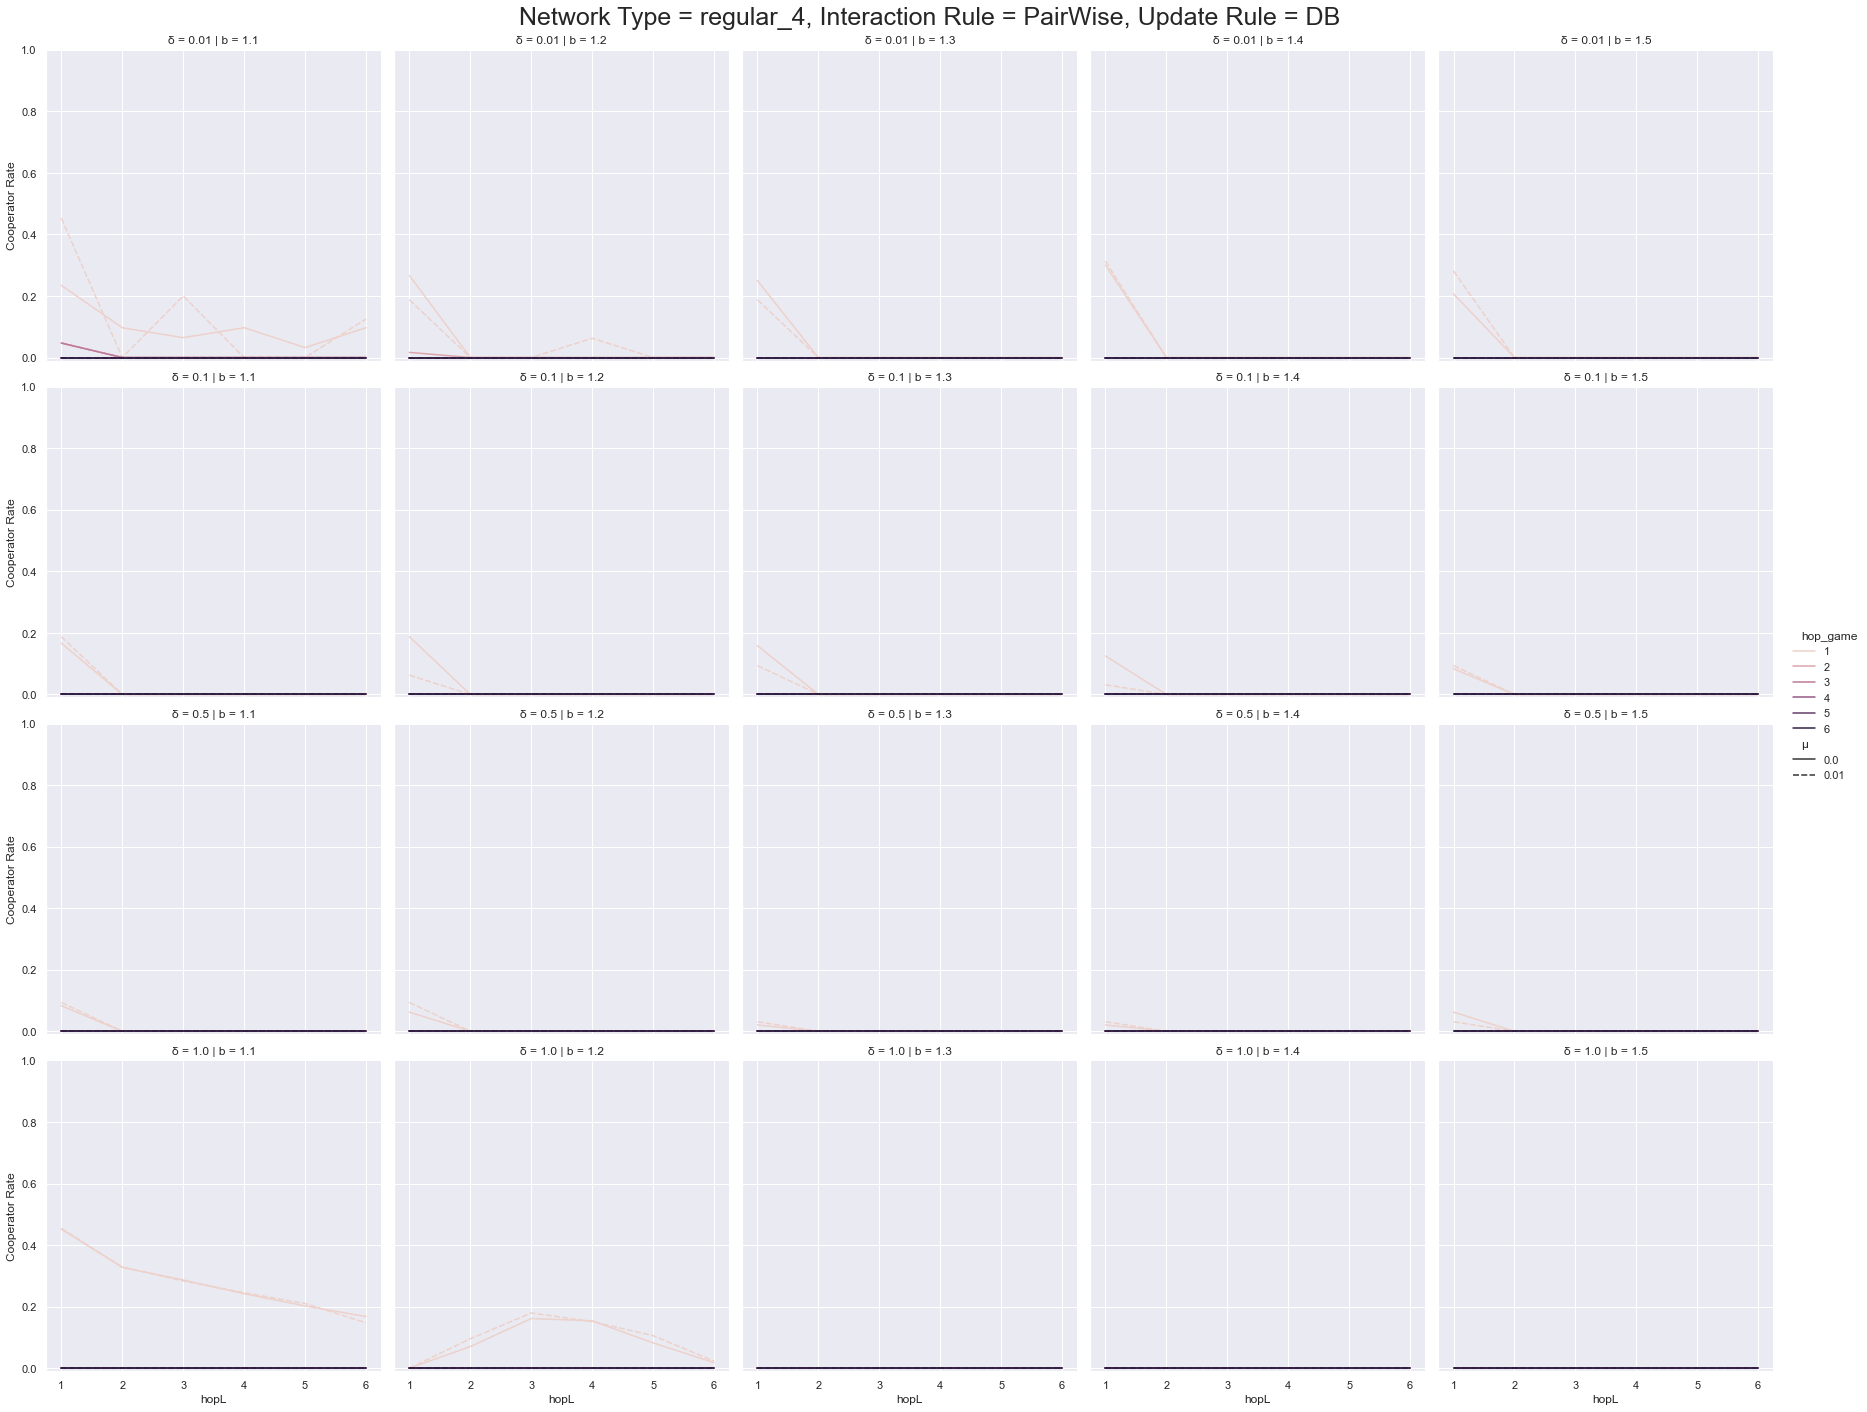

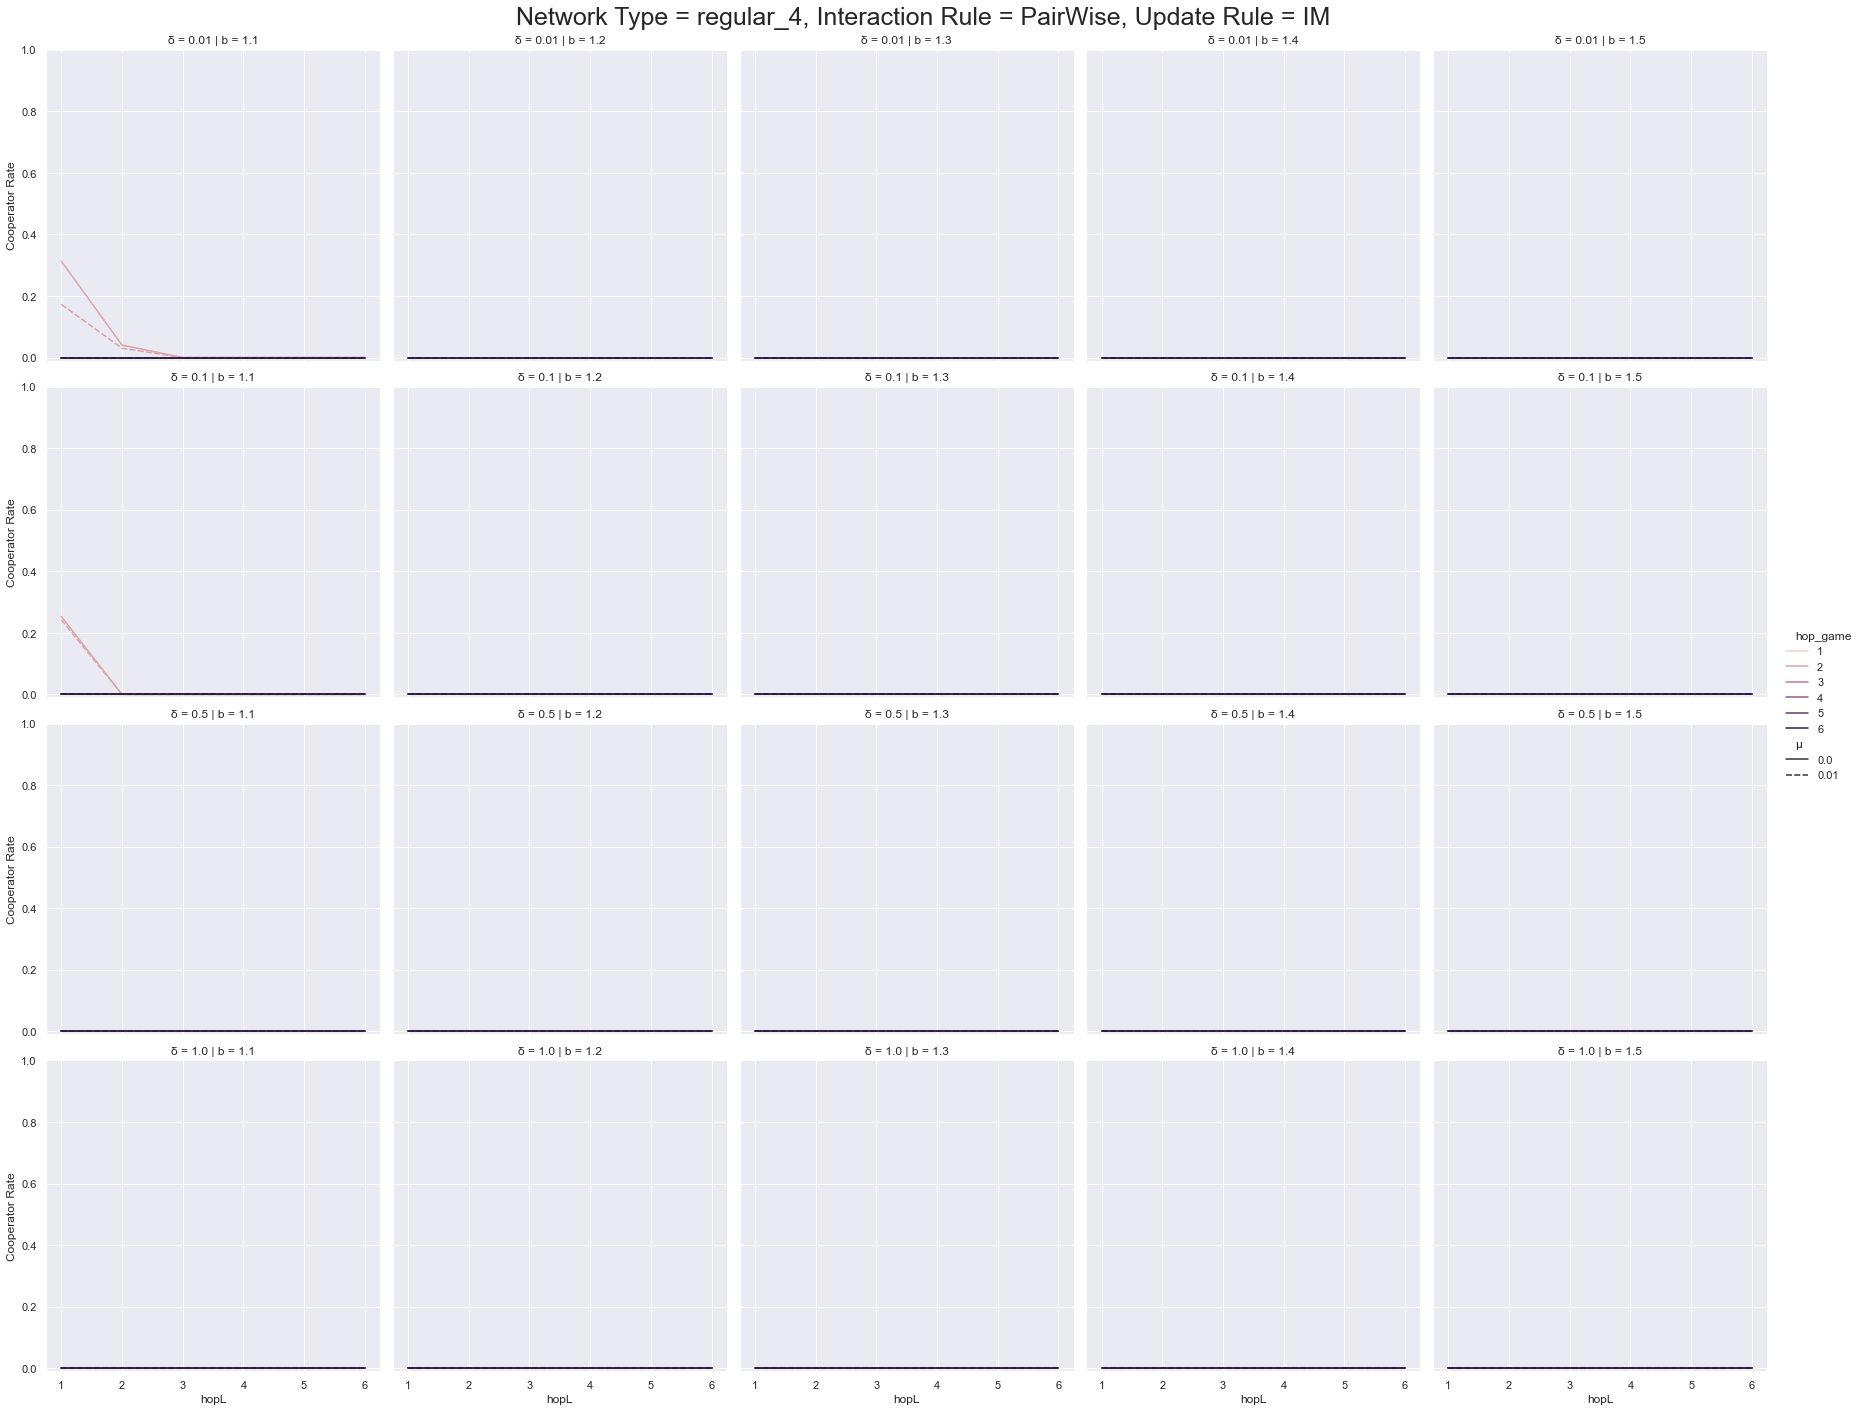

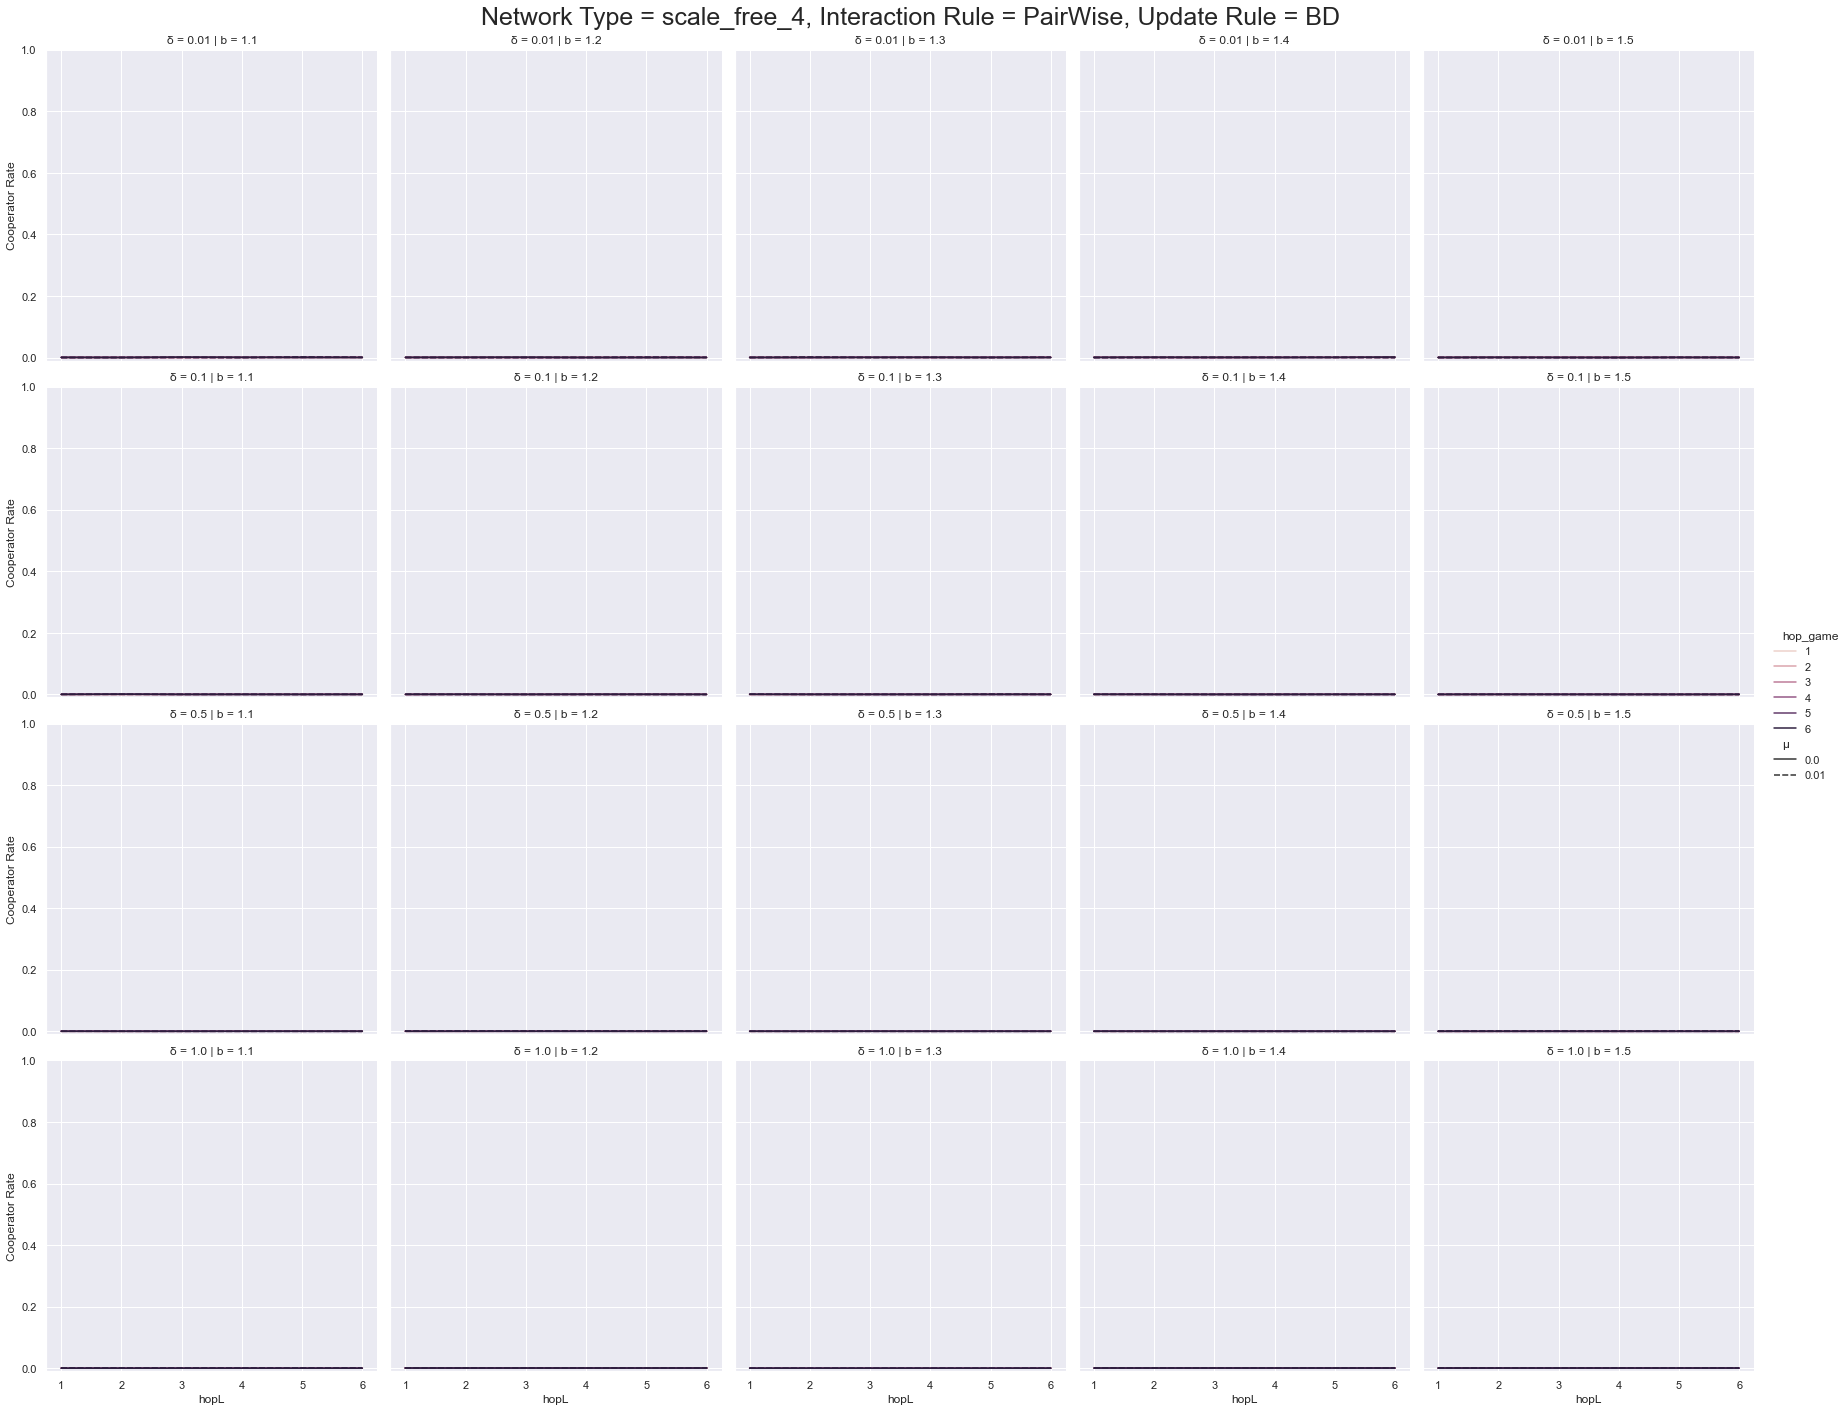

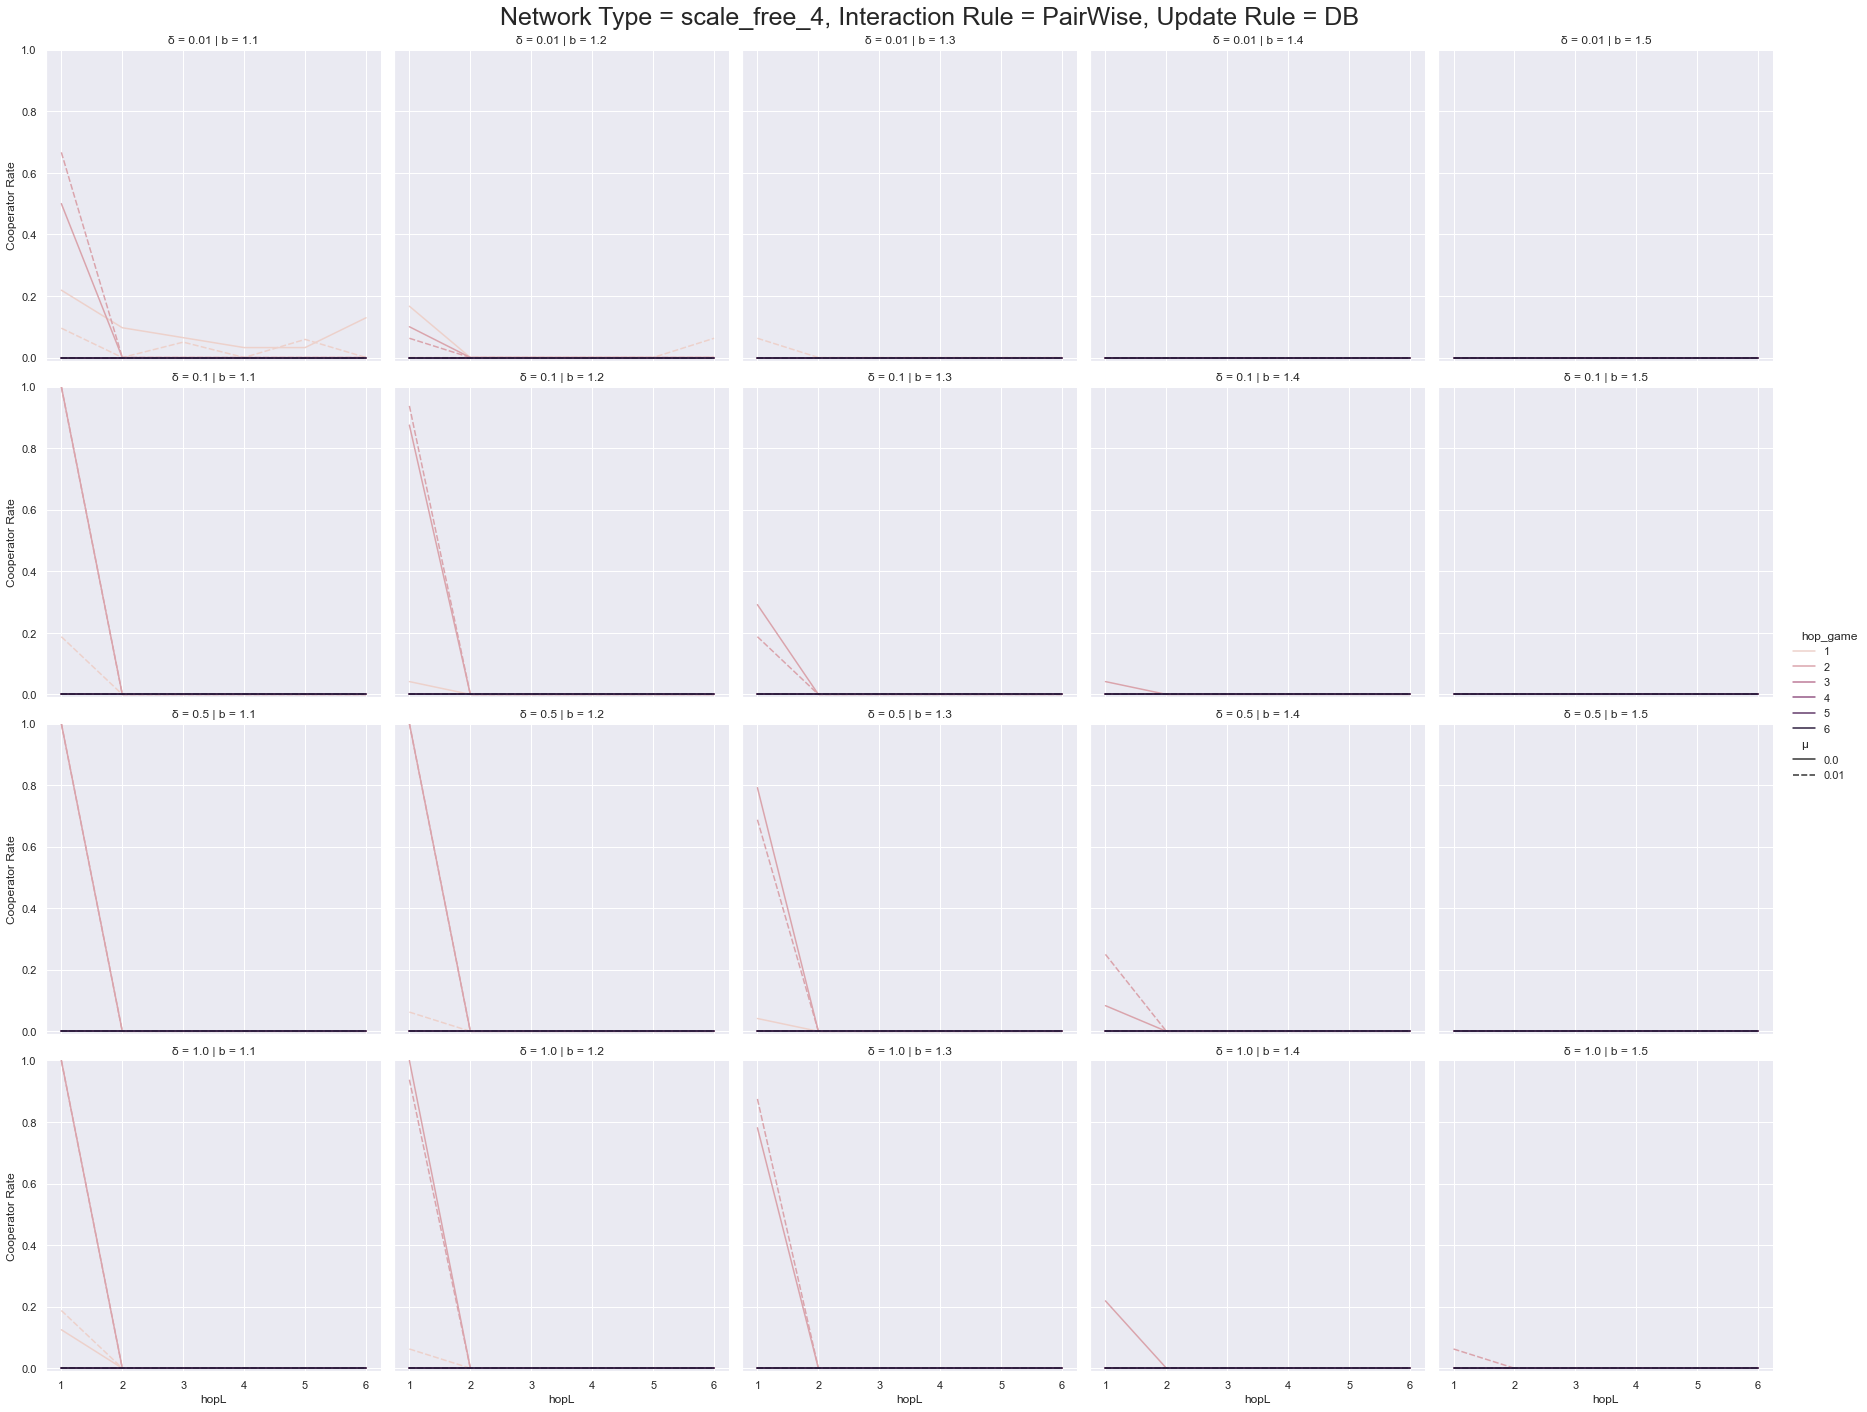

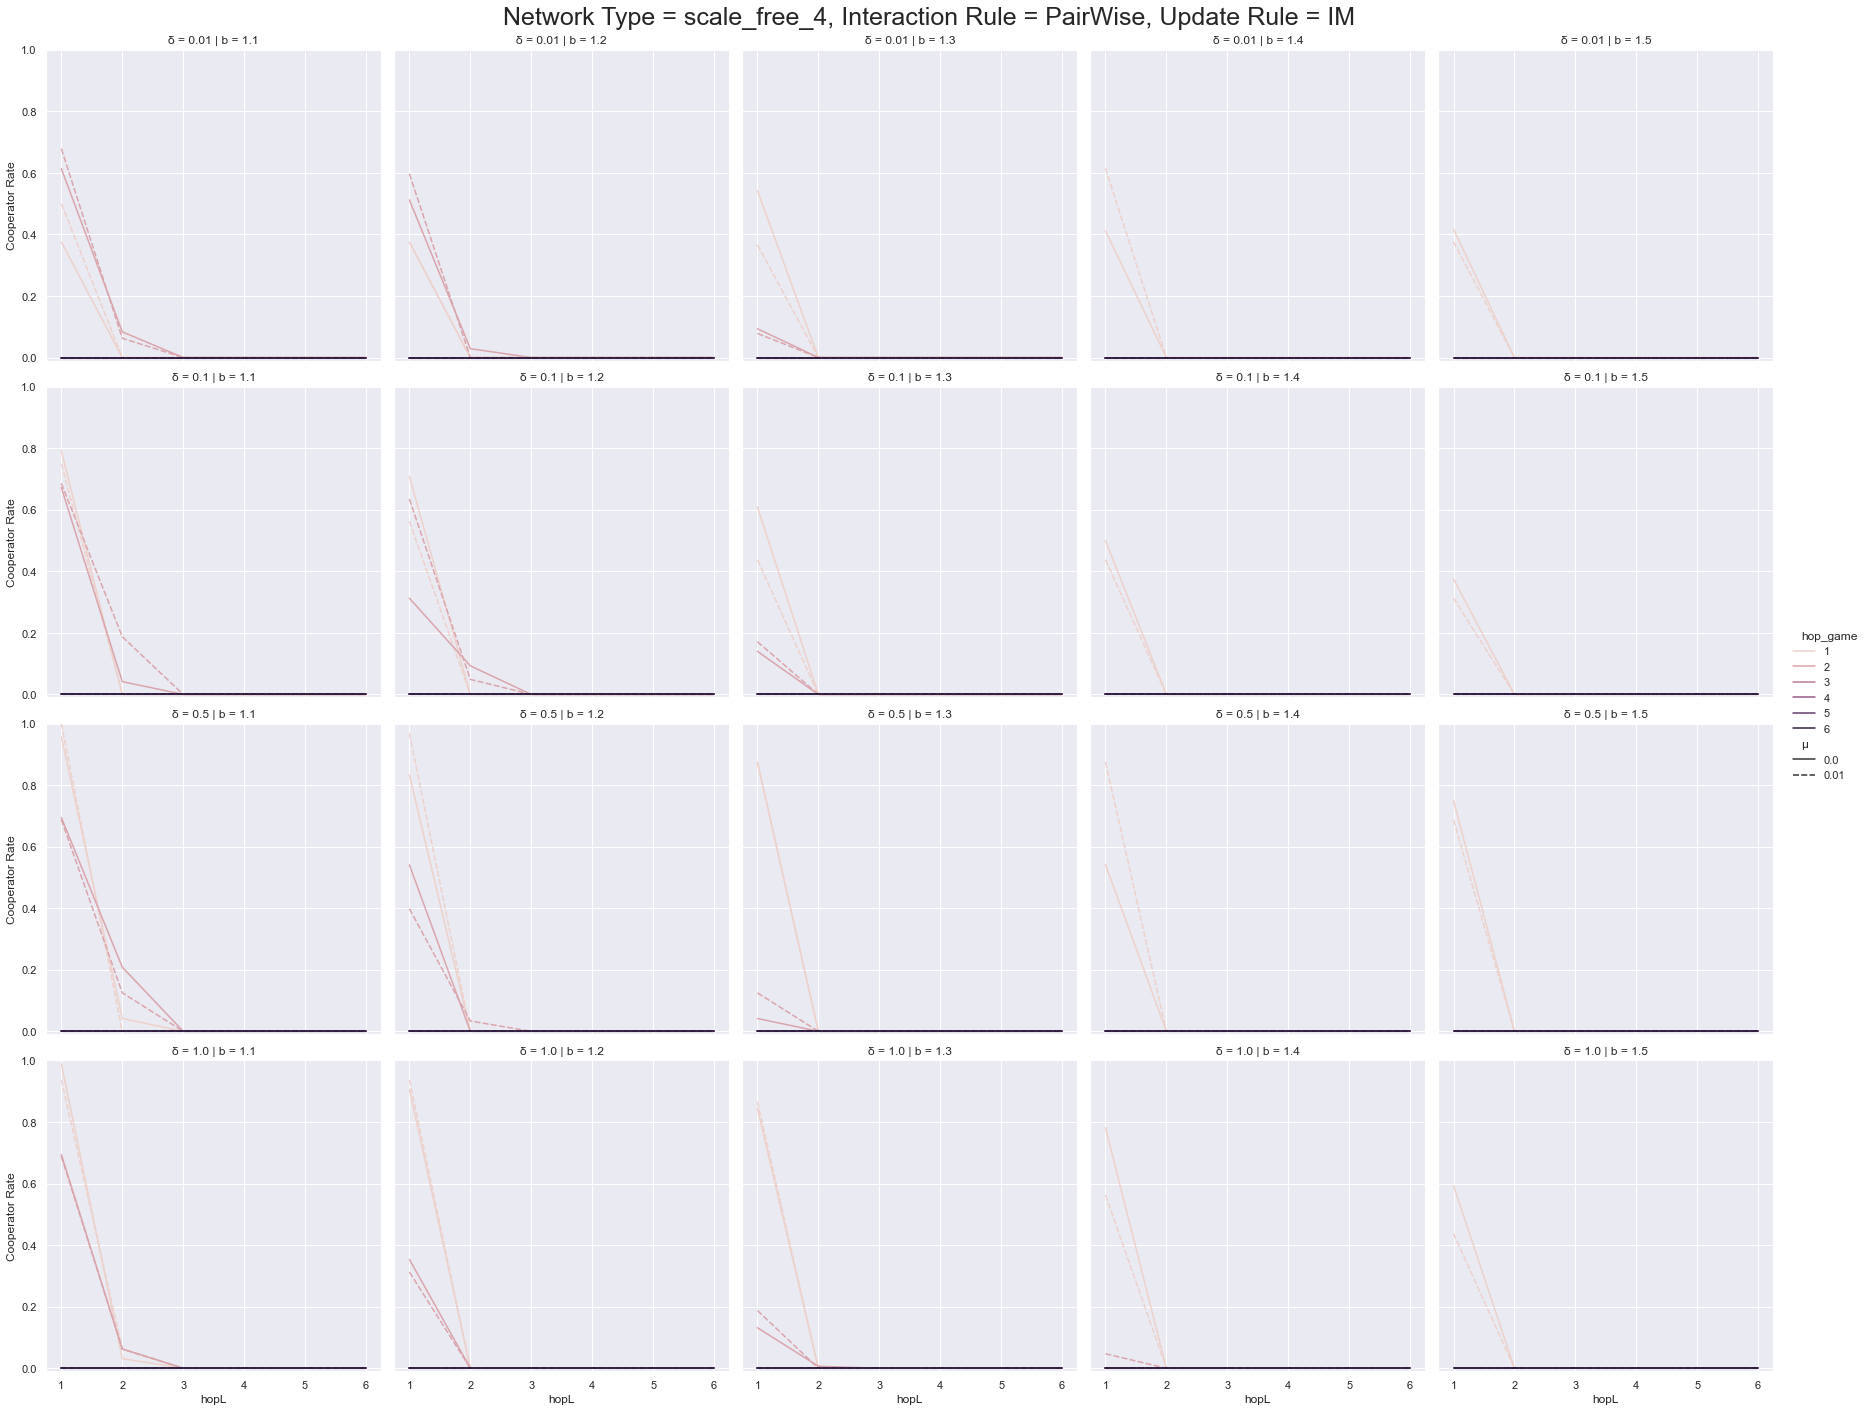

In [9]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='hop_game', row='δ', col='b', style='μ', data=_df)
    g.set_axis_labels('hopL', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Interaction Rule = {}, Update Rule = {}'.format(network_type, interaction_rule, update_rule), size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))